## Introduction to Vehicle Auction Analysis

#### Welcome to this data-driven journey exploring a comprehensive vehicle auction dataset. The following notebook is dedicated to analyzing transactional data from vehicle auctions to identify key factors that contribute to the success or failure of a purchase.

### Dataset Overview

##### Our dataset is a detailed compilation of vehicle transactions from various auctions. Each record details a singular transaction and includes a multitude of attributes such as the vehicle's make, model, year, odometer reading, color, and many more—spanning across both technical specifications and sales information.


In [76]:
import os
print(os.getcwd())
import requests
import matplotlib.pyplot as plt
import seaborn as sns


/workspaces/Isabell-Joane-Eric-Final-Project/src


### Section 2: Data Summary and Initial Observations

##### Initial Data Loading and Display of Basic Information
##### The dataset has been loaded successfully, and we have adjusted the display settings to show all columns for a comprehensive view. Below, we display the first and last few entries to get an initial feel of the data's structure and contents.


In [77]:
import pandas as pd

df = pd.read_csv("training.csv")

df

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  \
0                    MAZDA3    i         4D SEDAN I     RED         AUTO   
1       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO   
2                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO   
3                      NEON  SXT           4D SEDAN  SILVER         AUTO   
4                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL   
...                     ...  ...                ...     ...          ...   
72978                 SABLE   GS        4D SEDAN GS   BLACK         AUTO   
72979             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO   
72980  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO   
72981                IMPALA   LS        4D SEDAN LS   WHITE         AUTO   
72982                MAZDA6    s         4D SEDAN S  SILVER         AUTO   

       WheelTypeID WheelType  VehOdo  Nationality         Size  \
0              1.0     Alloy   89046  OTHER ASIAN       MEDIUM   
1              1.0     Alloy   93593     AMERICAN  LARGE TRUCK   
2              2.0    Covers   73807     AMERICAN       MEDIUM   
3              1.0     Alloy   65617     AMERICAN      COMPACT   
4              2.0    Covers   69367     AMERICAN      COMPACT   
...            ...       ...     ...          ...          ...   
72978          1.0     Alloy   45234     AMERICAN       MEDIUM   
72979          NaN       NaN   71759     AMERICAN       MEDIUM   
72980          1.0     Alloy   88500     AMERICAN   MEDIUM SUV   
72981          1.0     Alloy   79554     AMERICAN        LARGE   
72982          1.0     Alloy   66855  OTHER ASIAN       MEDIUM   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0                    OTHER                             8155.0   
1                 CHRYSLER                             6854.0   
2                 CHRYSLER                             3202.0   
3                 CHRYSLER                             1893.0   
4                     FORD                             3913.0   
...                    ...                                ...   
72978                 FORD                             1996.0   
72979                   GM                             6418.0   
72980             CHRYSLER                             8545.0   
72981                   GM                             6420.0   
72982                OTHER                             7535.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                               9829.0                           11636.0   
1                               8383.0                           10897.0   
2                               4760.0                            6943.0   
3                               2675.0                            4658.0   
4                               5054.0                            7723.0   
...                                ...                               ...   
72978                           2993.0                         

In [78]:
#Viewing all columns data
pd.set_option('display.max_columns', None)  
df.head()
df.tail()

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim         SubModel   Color Transmission  \
72978                 SABLE   GS      4D SEDAN GS   BLACK         AUTO   
72979             MALIBU 4C   LS      4D SEDAN LS  SILVER         AUTO   
72980  GRAND CHEROKEE 2WD V  Lar  4D WAGON LAREDO  SILVER         AUTO   
72981                IMPALA   LS      4D SEDAN LS   WHITE         AUTO   
72982                MAZDA6    s       4D SEDAN S  SILVER         AUTO   

       WheelTypeID WheelType  VehOdo  Nationality        Size  \
72978          1.0     Alloy   45234     AMERICAN      MEDIUM   
72979          NaN       NaN   71759     AMERICAN      MEDIUM   
72980          1.0     Alloy   88500     AMERICAN  MEDIUM SUV   
72981          1.0     Alloy   79554     AMERICAN       LARGE   
72982          1.0     Alloy   66855  OTHER ASIAN      MEDIUM   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
72978                 FORD                             1996.0   
72979                   GM                             6418.0   
72980             CHRYSLER                             8545.0   
72981                   GM                             6420.0   
72982                OTHER                             7535.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
72978                           2993.0                            2656.0   
72979                           7325.0                            7431.0   
72980                           9959.0                            9729.0   
72981                           7604.0                            7434.0   
72982                           8771.0                            8638.0   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
72978                         3732.0                         2190.0   
72979                         8411.0                         6785.0   
72980                        11256.0                         8375.0   
72981                         8712.0                         6590.0   
72982                         9973.0                         7730.0   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
72978                       3055.0                        4836.0   
72979                       8132.0                       10151.0   
72980                       9802.0                       11831.0   
72981                       7684.0                       10099.0   
72982                       9102.0                       11954.0   

       MMRCurrentRetailCleanPrice PRIMEUNIT AUCGUART  BYRNO  VNZIP1 VNST  \
72978                      5937.0       NaN      NaN  18111   30212   GA   
72979                     11652.0       NaN      NaN  18881   30212   GA   
72980                     14402.0       NaN      NaN  18111   30212   GA   
72981                     11228.0       NaN      NaN  18881   30212   GA   
72982                     13246.0       NaN      NaN  18111   30212   GA   

       VehBCost  IsOnlineSale  WarrantyCost  
72978    4200.0             0           993  
72979    6200.0             0          1038  
72980    8200.0             0          1893  
72981    7000.0             0          1974  
72982    8000.0             0          1313

In [79]:
df.shape

(72983, 34)

In [80]:
#total data columns
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [81]:
df.iloc[1]

RefId                                                  2
IsBadBuy                                               0
PurchDate                                      12/7/2009
Auction                                            ADESA
VehYear                                             2004
VehicleAge                                             5
Make                                               DODGE
Model                                1500 RAM PICKUP 2WD
Trim                                                  ST
SubModel                               QUAD CAB 4.7L SLT
Color                                              WHITE
Transmission                                        AUTO
WheelTypeID                                          1.0
WheelType                                          Alloy
VehOdo                                             93593
Nationality                                     AMERICAN
Size                                         LARGE TRUCK
TopThreeAmericanName           

In [82]:
#total info in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [83]:
df['Model'].value_counts(normalize=True)

Model
PT CRUISER              0.031912
IMPALA                  0.027267
TAURUS                  0.019525
CALIBER                 0.018840
CARAVAN GRAND FWD V6    0.017662
                          ...   
3.2 CL                  0.000014
G35 3.5L V6 SMPI        0.000014
I-290 PICKUP 2WD 4C     0.000014
AXIOM 2WD V6            0.000014
COMPASS 2WD 4C 2.0L     0.000014
Name: proportion, Length: 1063, dtype: float64

In [84]:
#Make
df['Make'].value_counts(normalize=True)

Make
CHEVROLET       0.236329
DODGE           0.176918
FORD            0.154899
CHRYSLER        0.121179
PONTIAC         0.058342
KIA             0.034035
SATURN          0.029637
NISSAN          0.028568
HYUNDAI         0.024814
JEEP            0.022526
SUZUKI          0.018196
TOYOTA          0.015675
MITSUBISHI      0.014113
MAZDA           0.013414
MERCURY         0.012510
BUICK           0.009865
GMC             0.008892
HONDA           0.006810
OLDSMOBILE      0.003330
VOLKSWAGEN      0.001836
ISUZU           0.001836
SCION           0.001768
LINCOLN         0.001329
INFINITI        0.000575
VOLVO           0.000507
CADILLAC        0.000452
ACURA           0.000452
LEXUS           0.000425
SUBARU          0.000384
MINI            0.000329
PLYMOUTH        0.000027
TOYOTA SCION    0.000014
HUMMER          0.000014
Name: proportion, dtype: float64

In [85]:
df.describe() 

RefId      IsBadBuy       VehYear    VehicleAge   WheelTypeID  \
count  72983.000000  72983.000000  72983.000000  72983.000000  69814.000000   
mean   36511.428497      0.122988   2005.343052      4.176644      1.494299   
std    21077.241302      0.328425      1.731252      1.712210      0.521290   
min        1.000000      0.000000   2001.000000      0.000000      0.000000   
25%    18257.500000      0.000000   2004.000000      3.000000      1.000000   
50%    36514.000000      0.000000   2005.000000      4.000000      1.000000   
75%    54764.500000      0.000000   2007.000000      5.000000      2.000000   
max    73014.000000      1.000000   2010.000000      9.000000      3.000000   

              VehOdo  MMRAcquisitionAuctionAveragePrice  \
count   72983.000000                       72965.000000   
mean    71499.995917                        6128.909217   
std     14578.913128                        2461.992768   
min      4825.000000                           0.000000   
25%     61837.000000                        4273.000000   
50%     73361.000000                        6097.000000   
75%     82436.000000                        7765.000000   
max    115717.000000                       35722.000000   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
count                     72965.000000                      72965.000000   
mean                       7373.636031                       8497.034332   
std                        2722.491986                       3156.285284   
min                           0.000000                          0.000000   
25%                        5406.000000                       6280.000000   
50%                        7303.000000                       8444.000000   
75%                        9021.000000                      10651.000000   
max                       36859.000000                      39080.000000   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
count                   72965.000000                   72668.000000   
mean                     9850.928240                    6132.081287   
std                      3385.789541                    2434.567723   
min                         0.000000                       0.000000   
25%                      7493.000000                    4275.000000   
50%                      9789.000000                    6062.000000   
75%                     12088.000000                    7736.000000   
max                     41482.000000                   35722.000000   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
count                 72668.000000                  72668.000000   
mean                   7390.681827                   8775.723331   
std                    2686.248852                   3090.702941   
min                       0.000000                      0.000000   
25%                    5414.000000                   6536.000000   
50%                    7313.000000                   8729.000000   
75%                    9013.000000                  10911.000000   
max                   36859.000000                  39080.000000   

       MMRCurrentRetailCleanPrice         BYRNO        VNZIP1      VehBCost  \
count                72668.000000  72983.000000  72983.000000  72983.000000   
mean                 10145.385314  26345.842155  58043.059945   6730.934326   
std                   3310.254351  25717.351219  26151.640415   1767.846435   
min                      0.000000    835.000000   2764.000000      1.000000   
25%                   7784.000000  17212.000000  32124.000000   5435.000000   
50%                  10103.000000  19662.000000  73108.000000   6700.000000   
75%                  12309.000000  22808.000000  80022.000000   7900.000000   
max                  41062.000000  99761.000000  99224.000000  45469.000000   

       IsOnlineSale  WarrantyCost  
count  72983.000000  72983.000000  
mean       0.025280   1276.580985  
std        0

In [86]:

## Summary statistics and initial observations

descriptive_stats = df.describe()

descriptive_stats

RefId      IsBadBuy       VehYear    VehicleAge   WheelTypeID  \
count  72983.000000  72983.000000  72983.000000  72983.000000  69814.000000   
mean   36511.428497      0.122988   2005.343052      4.176644      1.494299   
std    21077.241302      0.328425      1.731252      1.712210      0.521290   
min        1.000000      0.000000   2001.000000      0.000000      0.000000   
25%    18257.500000      0.000000   2004.000000      3.000000      1.000000   
50%    36514.000000      0.000000   2005.000000      4.000000      1.000000   
75%    54764.500000      0.000000   2007.000000      5.000000      2.000000   
max    73014.000000      1.000000   2010.000000      9.000000      3.000000   

              VehOdo  MMRAcquisitionAuctionAveragePrice  \
count   72983.000000                       72965.000000   
mean    71499.995917                        6128.909217   
std     14578.913128                        2461.992768   
min      4825.000000                           0.000000   
25%     61837.000000                        4273.000000   
50%     73361.000000                        6097.000000   
75%     82436.000000                        7765.000000   
max    115717.000000                       35722.000000   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
count                     72965.000000                      72965.000000   
mean                       7373.636031                       8497.034332   
std                        2722.491986                       3156.285284   
min                           0.000000                          0.000000   
25%                        5406.000000                       6280.000000   
50%                        7303.000000                       8444.000000   
75%                        9021.000000                      10651.000000   
max                       36859.000000                      39080.000000   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
count                   72965.000000                   72668.000000   
mean                     9850.928240                    6132.081287   
std                      3385.789541                    2434.567723   
min                         0.000000                       0.000000   
25%                      7493.000000                    4275.000000   
50%                      9789.000000                    6062.000000   
75%                     12088.000000                    7736.000000   
max                     41482.000000                   35722.000000   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
count                 72668.000000                  72668.000000   
mean                   7390.681827                   8775.723331   
std                    2686.248852                   3090.702941   
min                       0.000000                      0.000000   
25%                    5414.000000                   6536.000000   
50%                    7313.000000                   8729.000000   
75%                    9013.000000                  10911.000000   
max                   36859.000000                  39080.000000   

       MMRCurrentRetailCleanPrice         BYRNO        VNZIP1      VehBCost  \
count                72668.000000  72983.000000  72983.000000  72983.000000   
mean                 10145.385314  26345.842155  58043.059945   6730.934326   
std                   3310.254351  25717.351219  26151.640415   1767.846435   
min                      0.000000    835.000000   2764.000000      1.000000   
25%                   7784.000000  17212.000000  32124.000000   5435.000000   
50%                  10103.000000  19662.000000  73108.000000   6700.000000   
75%                  12309.000000  22808.000000  80022.000000   7900.000000   
max                  41062.000000  99761.000000  99224.000000  45469.000000   

       IsOnlineSale  WarrantyCost  
count  72983.000000  72983.000000  
mean       0.025280   1276.580985  
std        0

# EDA:

### Univariate analysis

## Categorical Feature Distribution by 'IsBadBuy' Status

In this section, we visualize the distribution of various categorical features in the dataset to understand their relationship with the 'IsBadBuy' status. A car with 'IsBadBuy' equal to 1 indicates a problematic purchase (commonly referred to as a "lemon"), while a value of 0 indicates a good purchase.

We focus on four key features that might influence the 'IsBadBuy' status: 'Nationality', 'Auction', 'Make', and 'SubModel'. The bar plots will help us to compare the frequency of good and bad buys across different categories within these features.

For each categorical feature, we create a separate bar plot. These plots are organized in a 2x2 grid for a clearer comparison:

1. **Nationality**: This plot shows the count of cars by the nationality of the manufacturer for both good and bad buys. We can see if cars from certain nationalities are more likely to be a bad buy.

2. **Auction**: Here, we compare the number of bad buys to good ones based on the auction house selling the vehicle. It might reveal if certain auction houses are associated with a higher risk of bad buys.

3. **Make**: This plot illustrates the count of cars by their make, split by the 'IsBadBuy' status. It provides insights into whether specific makes are more prone to being classified as lemons.

4. **SubModel**: This graph presents the distribution of cars by submodel. Due to a large number of submodels, the x-axis labels can overlap and make it challenging to read individual categories. However, it gives a high-level view of which submodels are associated with higher or lower rates of bad buys.




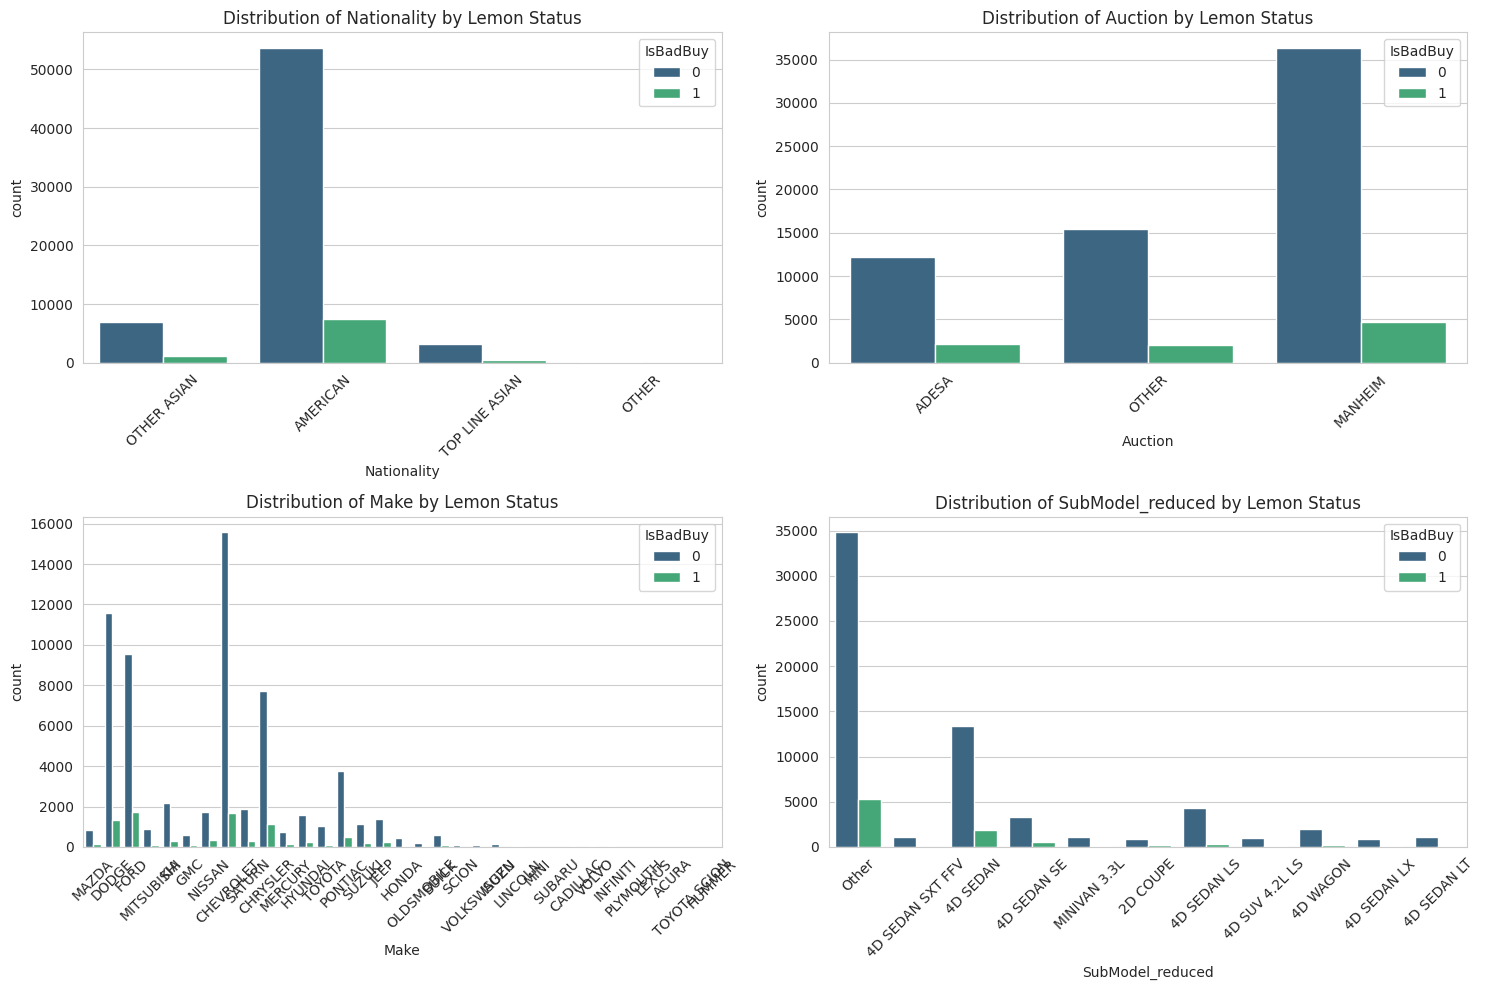

In [87]:
top_submodels = df['SubModel'].value_counts().nlargest(10).index
df['SubModel_reduced'] = df['SubModel'].apply(lambda x: x if x in top_submodels else 'Other')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Replace 'SubModel' with 'SubModel_reduced' in the categorical_features list
categorical_features = ['Nationality', 'Auction', 'Make', 'SubModel_reduced']

for ax, feature in zip(axes, categorical_features):
    sns.countplot(data=df, x=feature, hue='IsBadBuy', ax=ax, palette='viridis')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Distribution of {feature} by Lemon Status')
    ax.legend(title='IsBadBuy', loc='upper right')


plt.tight_layout()
plt.show()


# Bivariate Analysis: Vehicle Age, Year, and Warranty Cost

In the realm of car auctions, understanding the characteristics that may indicate a problematic car, known as a "lemon," is crucial for making informed purchasing decisions. This section of our analysis explores the relationship between the 'IsBadBuy' status of a vehicle and three significant features: Vehicle Age, Vehicle Year, and Warranty Cost.

We use histograms with density plots to conduct a bivariate analysis, which allows us to visualize the distribution of these features for both lemons (bad buys) and non-lemons (good buys):

1. **Vehicle Age**: The age of a vehicle could be a critical factor in determining its reliability. The histogram shows how the age distribution compares between lemons and non-lemons.

2. **Vehicle Year**: Much like the age, the manufacturing year of a car might give us insight into its propensity to be a lemon. We look at the distribution of the car's manufacturing year across our two categories of interest.

3. **Warranty Cost**: The cost of a car's warranty might reflect its expected maintenance and reliability issues. This graph will help us see if higher warranty costs are associated with lemons.

Each feature is plotted individually, where:
- Blue represents the distribution for non-lemons (good buys), and
- Red represents the distribution for lemons (bad buys).




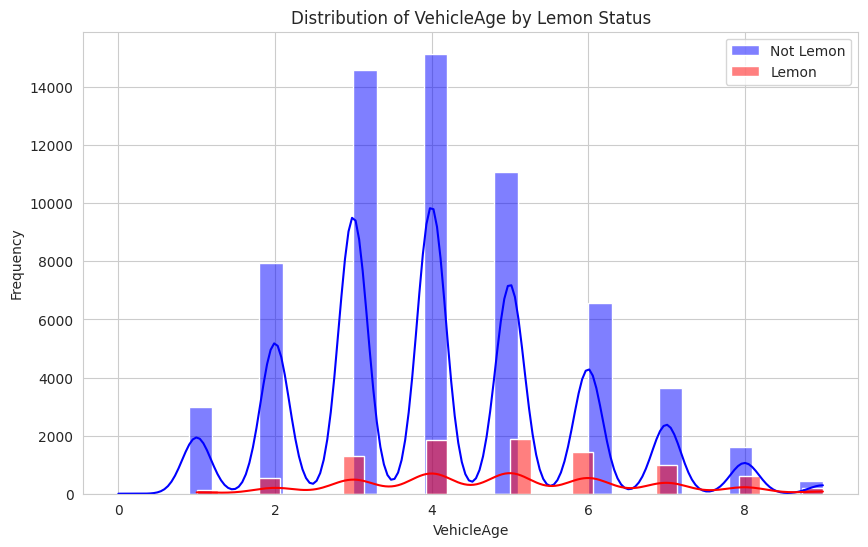

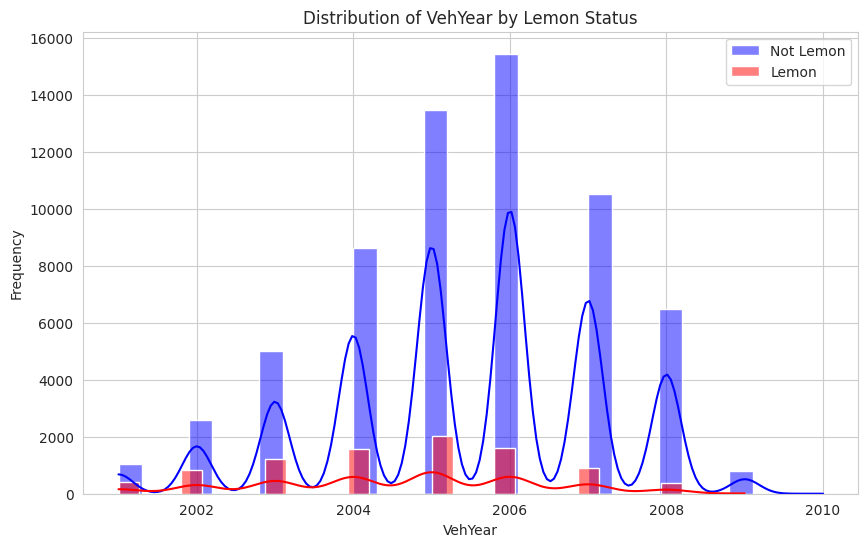

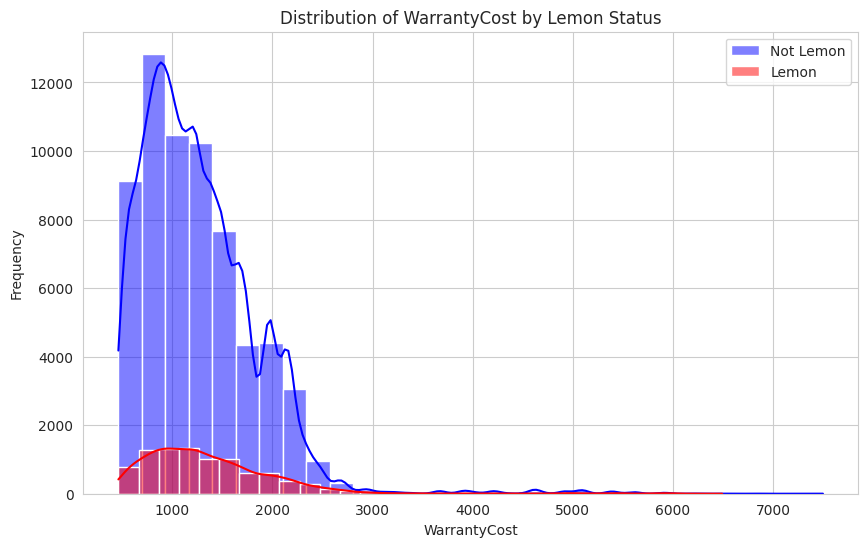

In [88]:
#Bivariate analysis using histogram:

sns.set_style("whitegrid")

# Histograms and Density Plots
features_to_plot = ['VehicleAge', 'VehYear', 'WarrantyCost']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))

    # Create a histogram with a density plot for non-lemons
    sns.histplot(df[df['IsBadBuy'] == 0][feature], kde=True, color="blue", label='Not Lemon', bins=30)

    # Create a histogram with a density plot for lemons
    sns.histplot(df[df['IsBadBuy'] == 1][feature], kde=True, color="red", label='Lemon', bins=30)

    plt.title(f'Distribution of {feature} by Lemon Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.show()

###

# Bivariate Analysis: Correlation Heatmap of Numerical Features

In data science, particularly when dealing with datasets like car auctions, it's important to understand the relationships between different numerical features and how they correlate with the target outcome—in our case, identifying 'lemons' or bad buys. A 'lemon' is a term used to describe a car that turns out to have several manufacturing defects affecting its value, safety, and utility.

To uncover these relationships, we employ a correlation heatmap, which is a graphical representation of the correlation matrix. The correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, it means that when one variable changes, the other variable tends to change in a specific direction.

Here's how we generate and interpret the heatmap:

1. We first filter our dataset to include only numerical features because correlation requires numerical data to calculate. This includes variables like 'Vehicle Age', 'Warranty Cost', and 'VehOdo' (Vehicle Odometer reading).

2. We then calculate the correlation matrix, which quantifies the degree to which these numerical features move together. 

3. With our correlation matrix in hand, we use `sns.heatmap` to create a visual representation. In this heatmap:
   - Each square shows the correlation between the variables on each axis. 
   - Correlation ranges from -1 to +1. Values closer to +1 indicate a high positive correlation (i.e., as one feature increases, so does the other), and values closer to -1 indicate a high negative correlation (i.e., as one feature increases, the other decreases).
   - A value of 0 indicates no correlation.
   - We use a diverging color scheme (`'coolwarm'`) where warm colors represent higher correlations and cool colors represent lower correlations.

4. We annotate each cell with the actual correlation coefficient, making it easier to see the exact value of the correlations.

5. Finally, the title and axis labels clearly state that we are examining the correlations between the numerical features of our dataset.




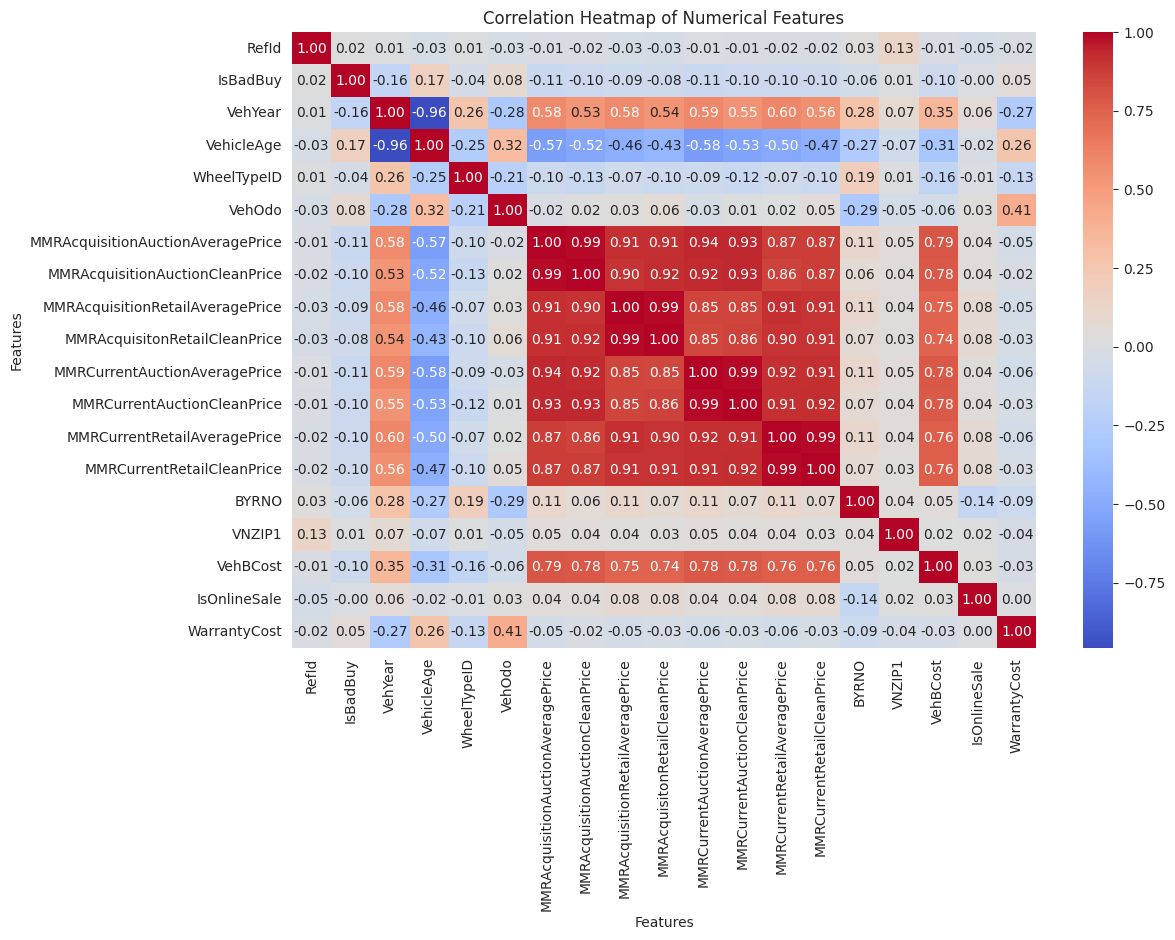

In [89]:
#Bivariate analysis using heatmap
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df['IsBadBuy'] = df['IsBadBuy']  # Adding the target variable

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Title and labels
plt.title('Correlation Heatmap of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

## Summary of Vehicle Purchase Analysis

This summary presents an analysis of car purchases, focusing on the relationship between the make of the car and whether the purchase was flagged as a bad buy.



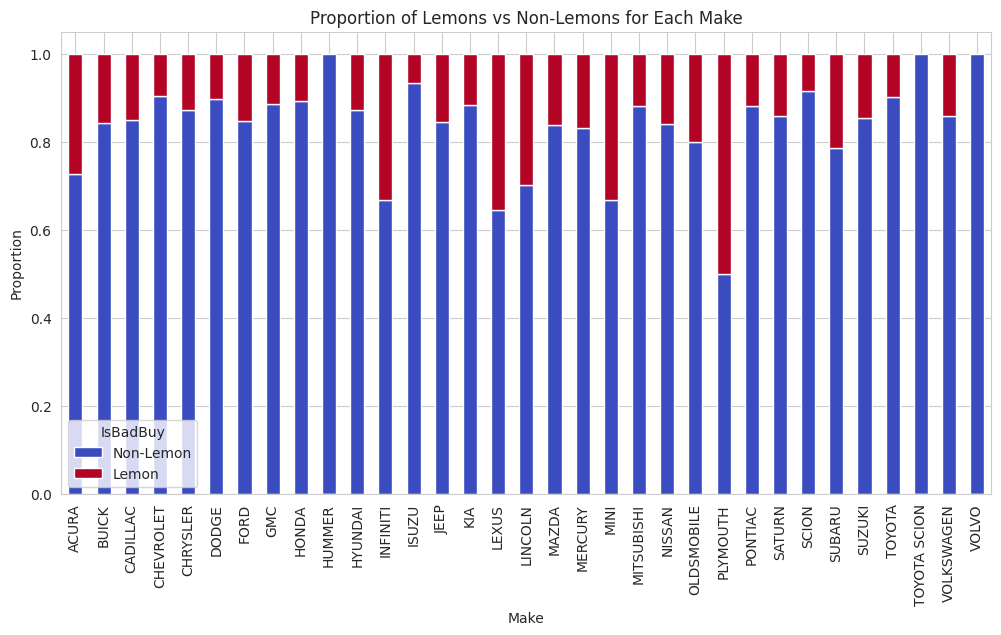

In [90]:
# Assuming 'Make' is a categorical variable and 'IsBadBuy' is the target variable
# Group the data by 'Make' and 'IsBadBuy' and count the occurrences
make_counts = df.groupby(['Make', 'IsBadBuy']).size().unstack()

# Normalize the counts to get the proportion of each 'IsBadBuy' category within each 'Make'
make_proportions = make_counts.div(make_counts.sum(axis=1), axis=0)

# Create a stacked bar chart
make_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

# Title and labels
plt.title('Proportion of Lemons vs Non-Lemons for Each Make')
plt.xlabel('Make')
plt.ylabel('Proportion')

# Legend
plt.legend(title='IsBadBuy', labels=['Non-Lemon', 'Lemon'])

plt.show()

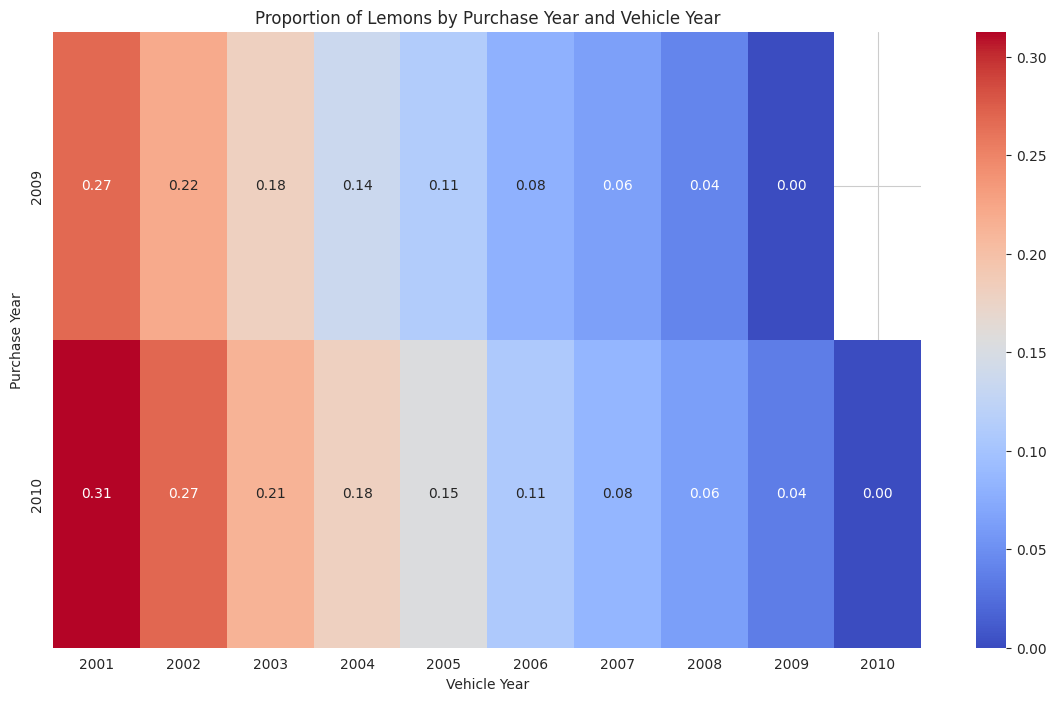

In [91]:
df['PurchDate'] = pd.to_datetime(df['PurchDate'])
df['PurchYear'] = df['PurchDate'].dt.year  # Assuming you want to group by purchase year

# Group by 'PurchYear' and 'VehYear', and calculate the mean of 'IsBadBuy'
# The mean will represent the proportion of lemons since 'IsBadBuy' is 0 or 1
lemon_proportion = df.groupby(['PurchYear', 'VehYear'])['IsBadBuy'].mean().reset_index()

# Pivot the data to have 'PurchYear' on the index and 'VehYear' as columns
pivot_data = lemon_proportion.pivot(index='PurchYear', columns='VehYear', values='IsBadBuy')


# Use heatmap to visualize the pivot table
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Proportion of Lemons by Purchase Year and Vehicle Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Purchase Year')
plt.show()


### Multivariate Analysis with Pair Plot
We're going deeper into our data by looking at several variables at once. To do this, we use something called a pair plot. Imagine looking at a grid that compares each variable with every other variable. It's a quick way to spot which features might be related or influence each other.

### What Are We Looking At?
In the pair plot, each small graph compares two variables. If a variable is plotted against itself, we get a histogram that shows us how often each value occurs. When two different variables are compared, we see scatter plots that can reveal correlations or patterns.

### Why Is This Useful?
This bird's-eye view of our dataset allows us to identify relationships without getting bogged down in the details. For example, if we're looking at cars, we might compare age, odometer readings, cost, and warranty information to determine if a car might be a "lemon" (a car with many defects).

### Interpreting the Colors
We use colors to quickly show if a car was a bad buy (a lemon). This color-coding makes it easy to spot trends: maybe older cars tend to be lemons more often, or maybe it's cars with higher mileage. The patterns that emerge from these colors can guide us on where to look next.

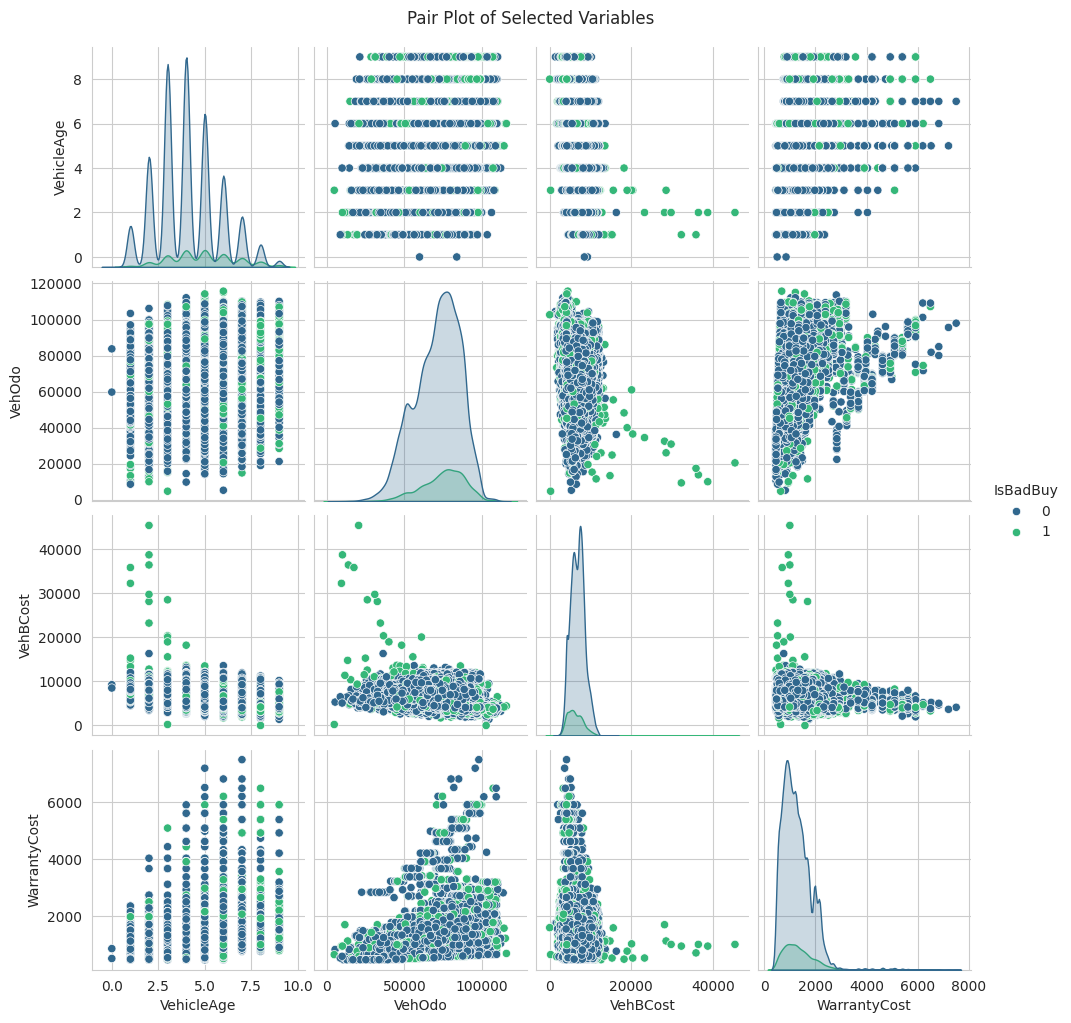

In [92]:


# Select a subset of the dataset with the variables of interest
variables_of_interest = ['VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost', 'IsBadBuy']
sub_df = df[variables_of_interest]

# Use seaborn's pairplot function to create the pair plot
# hue='IsBadBuy' colors data points to distinguish between lemons and non-lemons
pairplot_fig = sns.pairplot(sub_df, hue='IsBadBuy', palette='viridis')

# Set the title of the pair plot
pairplot_fig.fig.suptitle('Pair Plot of Selected Variables', y=1.02)

# Show the plot
plt.show()


In [93]:
# Mode for all columns
mode = df.mode().head(1)
print(mode)



   RefId  IsBadBuy  PurchDate  Auction  VehYear  VehicleAge       Make  \
0      1       0.0 2010-11-23  MANHEIM   2006.0         4.0  CHEVROLET   

        Model Trim  SubModel   Color Transmission  WheelTypeID WheelType  \
0  PT CRUISER  Bas  4D SEDAN  SILVER         AUTO          1.0     Alloy   

    VehOdo Nationality    Size TopThreeAmericanName  \
0  75009.0    AMERICAN  MEDIUM                   GM   

   MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
0                                0.0                              0.0   

   MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
0                               0.0                            0.0   

   MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
0                            0.0                          0.0   

   MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
0                           0.0                         0.0        NO   

  AUCGUART    BYRNO  

In [94]:
# Select only the numeric columns for skewness and kurtosis
numeric_df = df.select_dtypes(include=['number'])

# Skewness for each numeric feature
skewness = numeric_df.skew()
print("Skewness:\n", skewness)

# Kurtosis for each numeric feature
kurtosis = numeric_df.kurtosis()
print("\nKurtosis:\n", kurtosis)


Skewness:
 RefId                               -0.000203
IsBadBuy                             2.295943
VehYear                             -0.337361
VehicleAge                           0.393616
WheelTypeID                          0.250269
VehOdo                              -0.453145
MMRAcquisitionAuctionAveragePrice    0.463641
MMRAcquisitionAuctionCleanPrice      0.466501
MMRAcquisitionRetailAveragePrice     0.209214
MMRAcquisitonRetailCleanPrice        0.176300
MMRCurrentAuctionAveragePrice        0.522583
MMRCurrentAuctionCleanPrice          0.535525
MMRCurrentRetailAveragePrice         0.201356
MMRCurrentRetailCleanPrice           0.194780
BYRNO                                2.129225
VNZIP1                              -0.103532
VehBCost                             0.715931
IsOnlineSale                         6.048522
WarrantyCost                         2.070831
PurchYear                           -0.078464
dtype: float64

Kurtosis:
 RefId                                -1.19

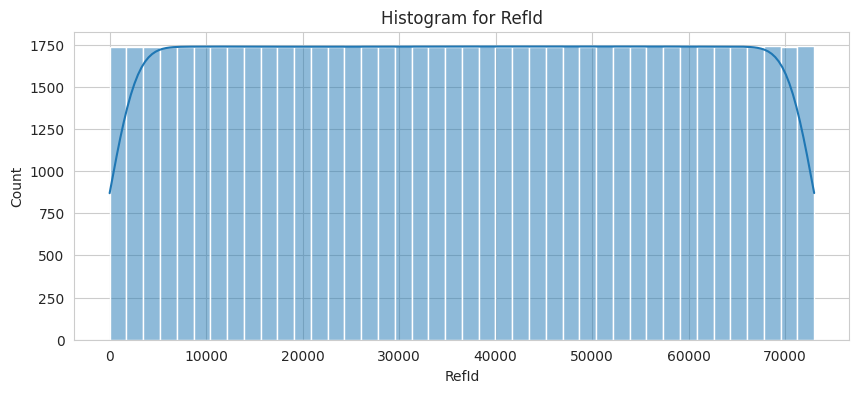

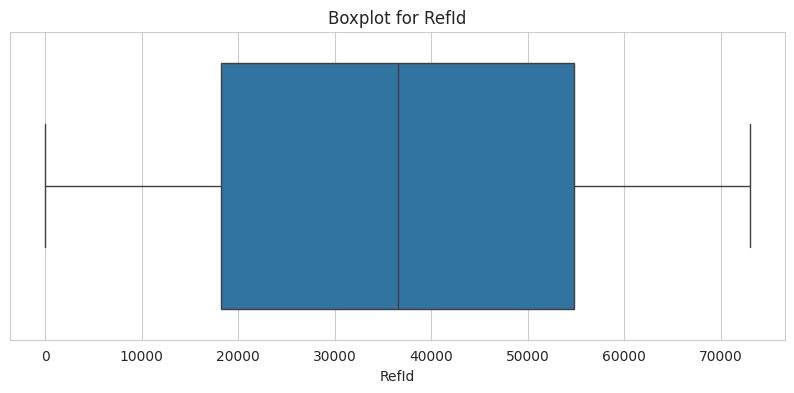

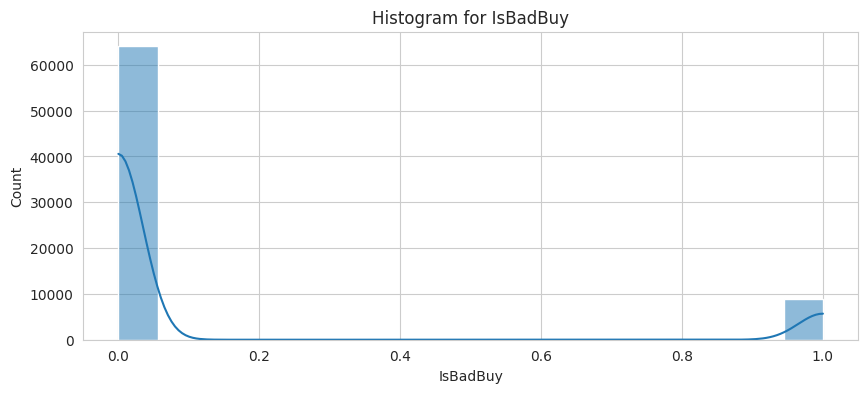

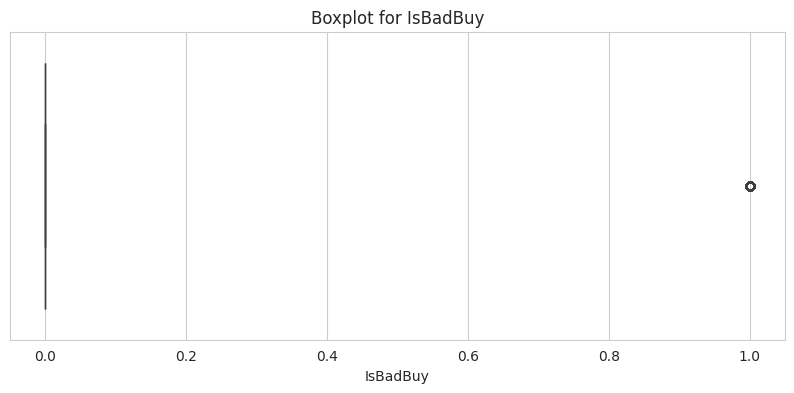

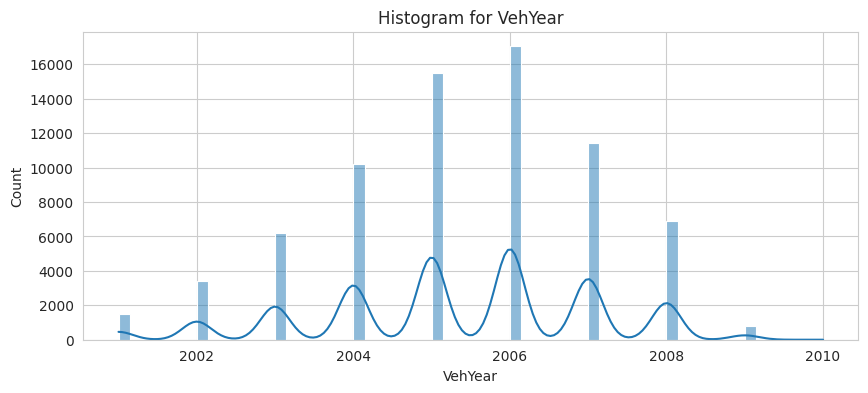

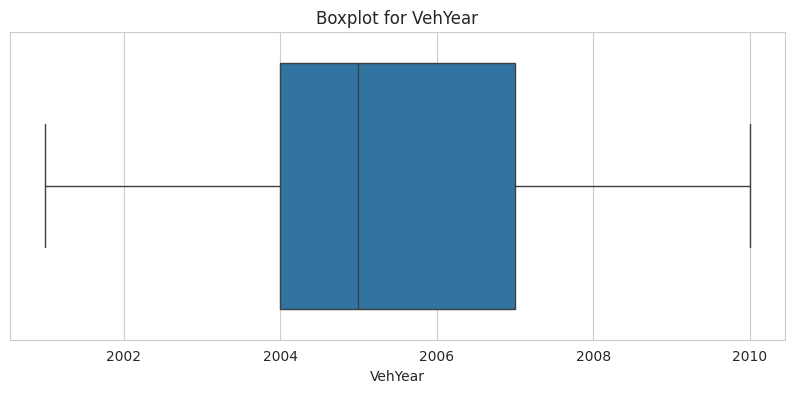

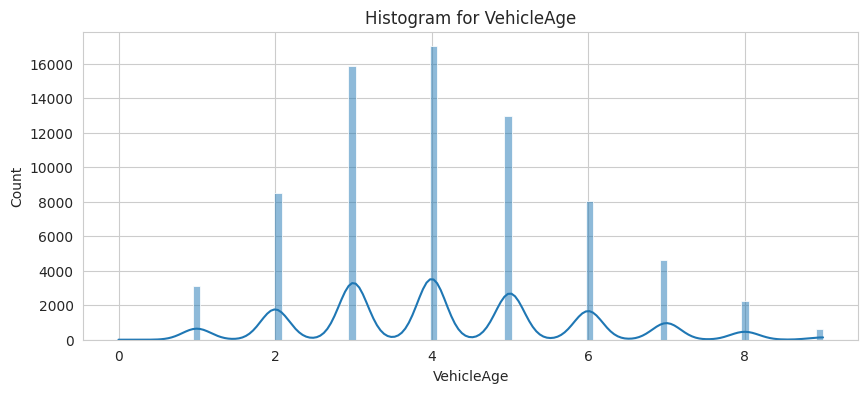

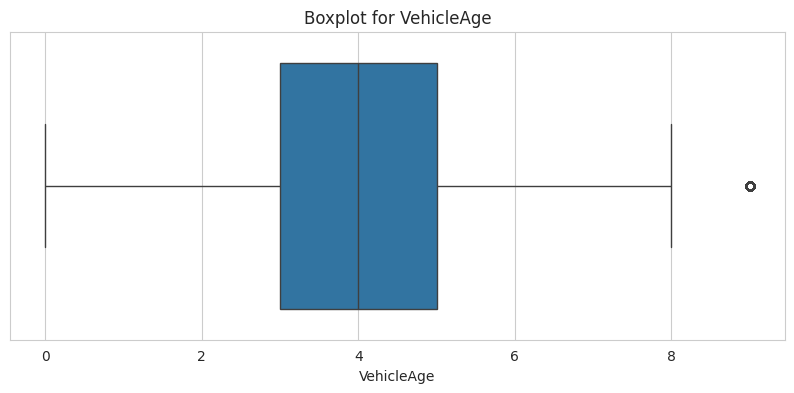

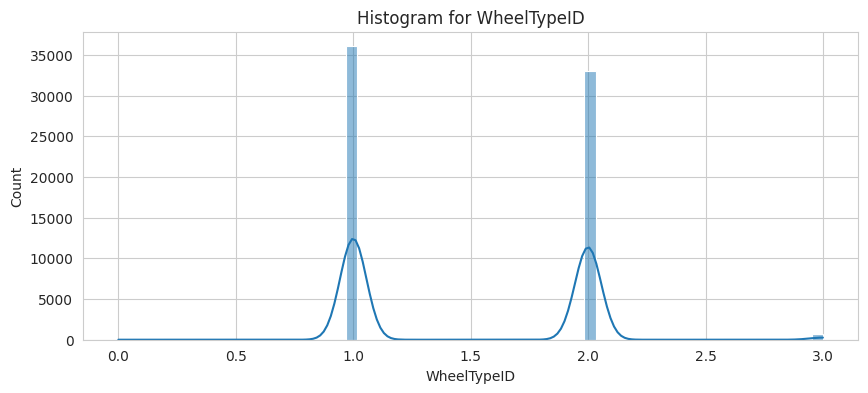

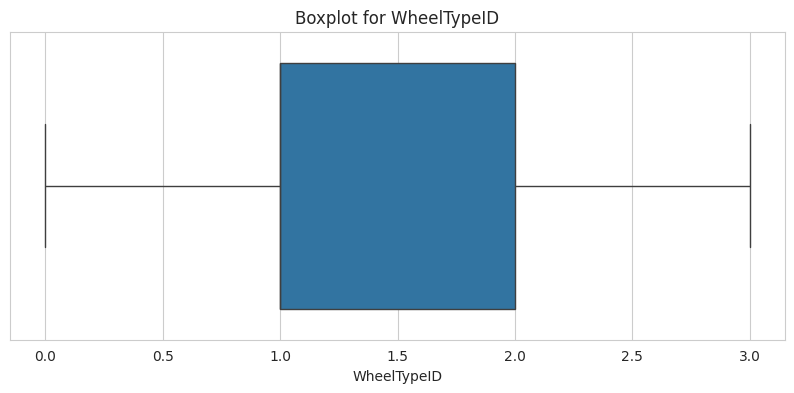

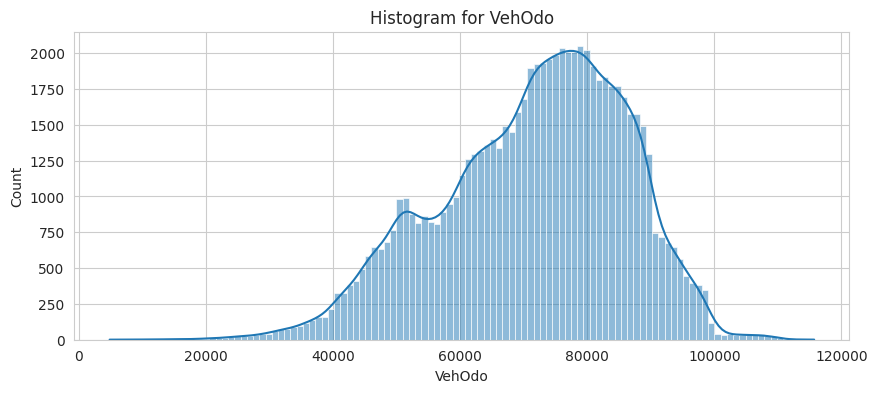

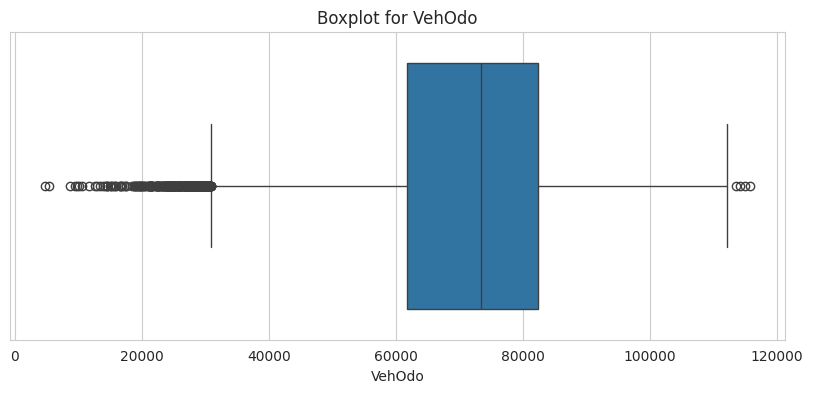

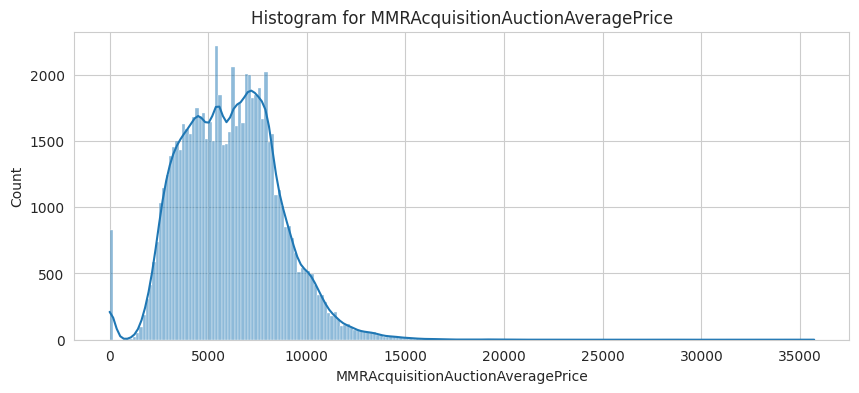

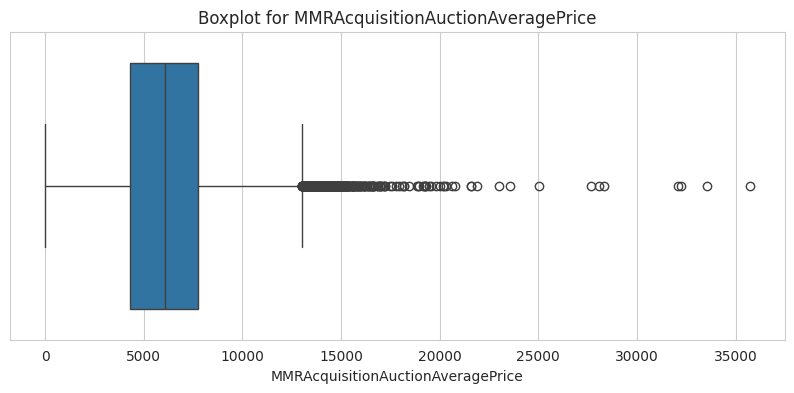

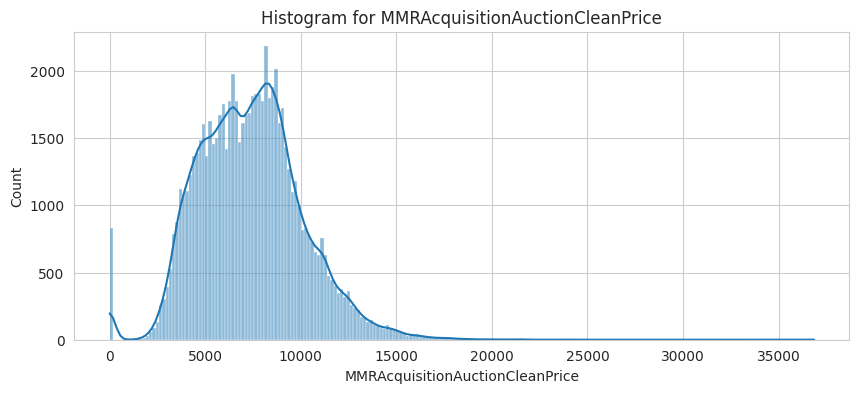

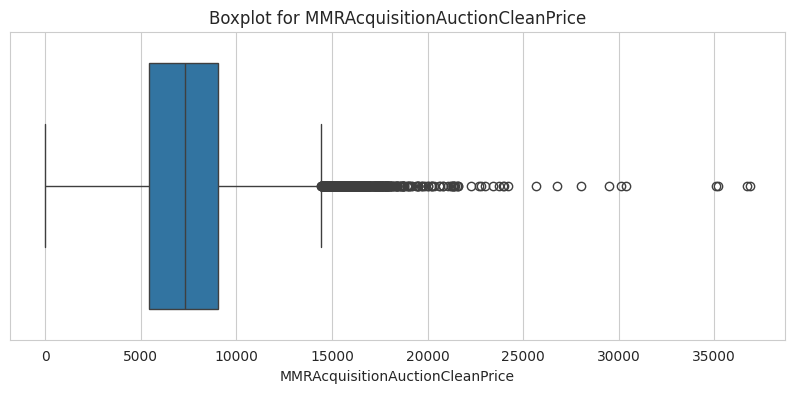

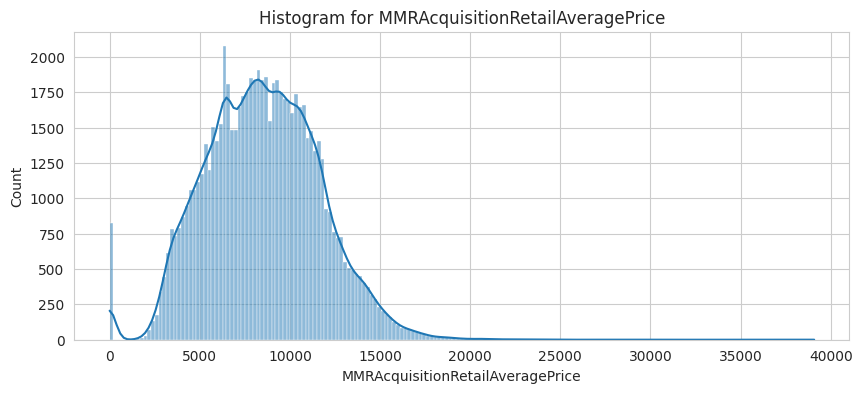

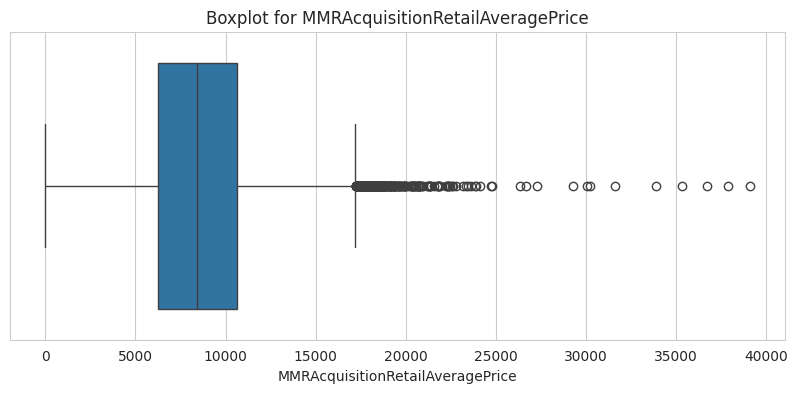

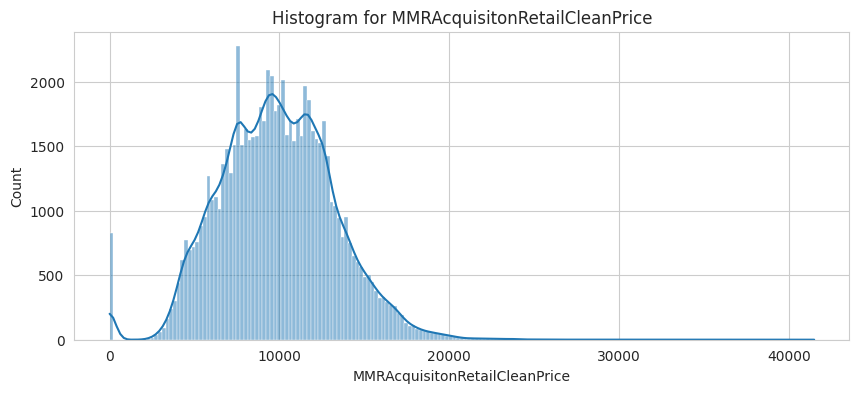

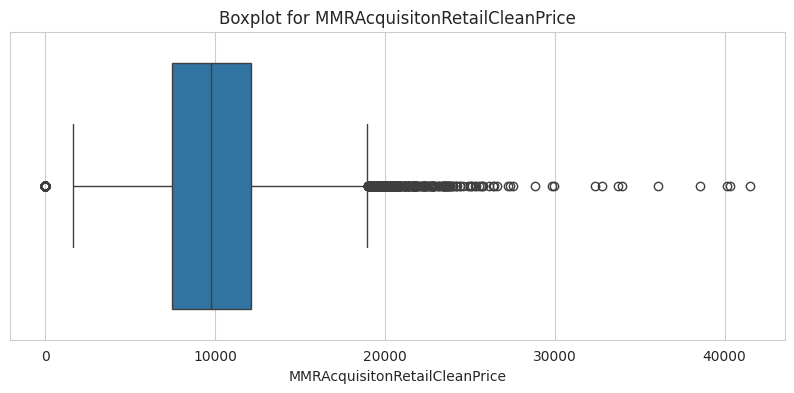

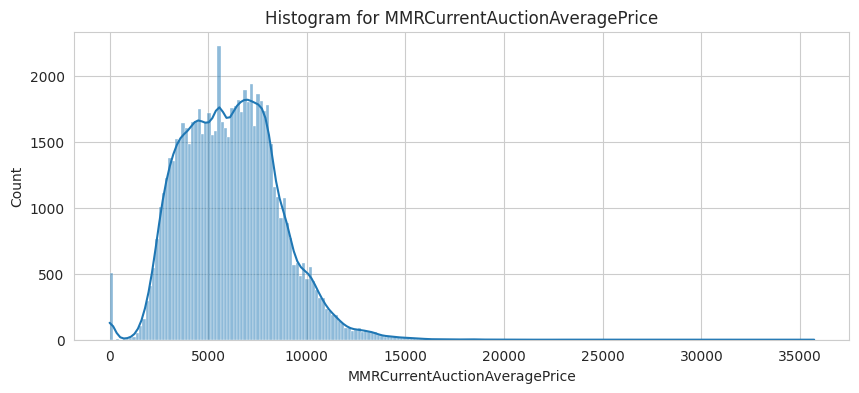

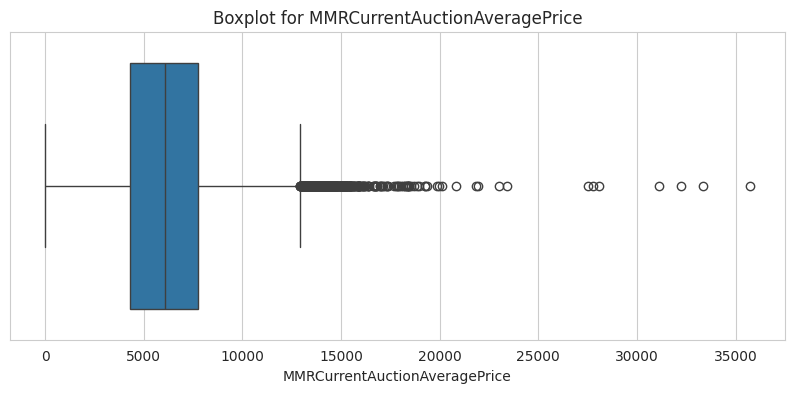

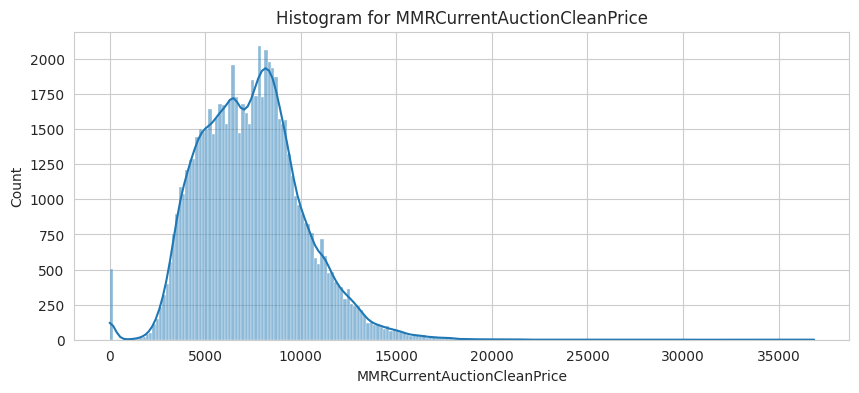

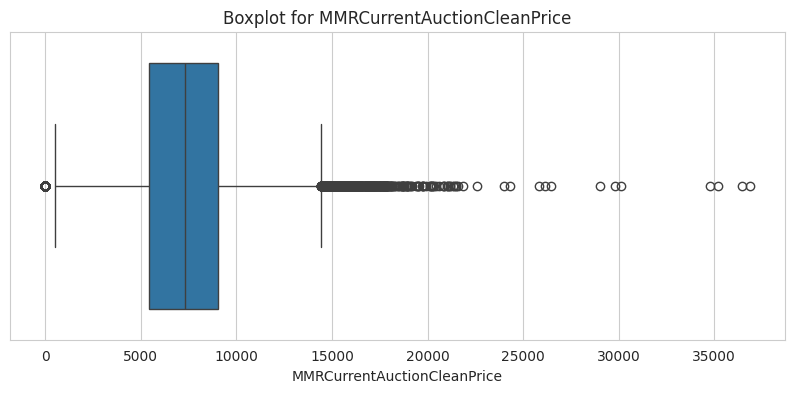

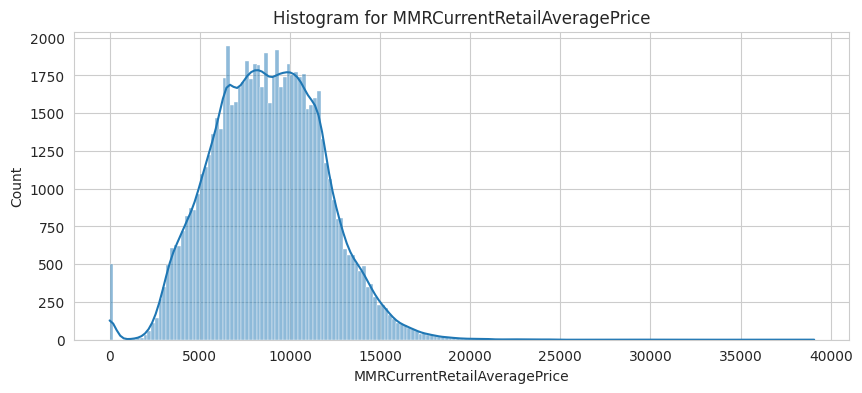

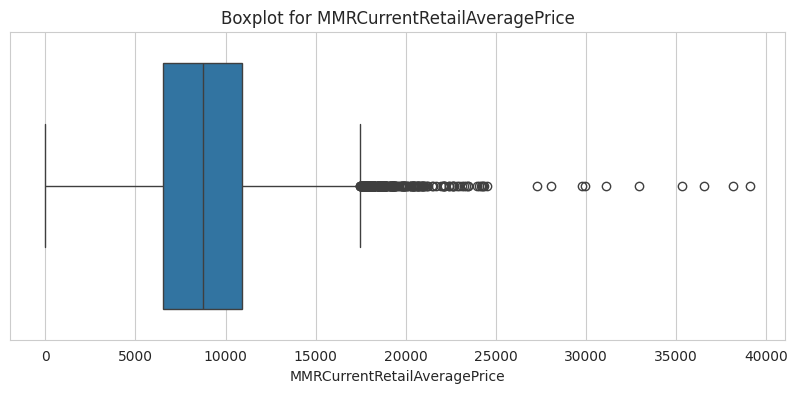

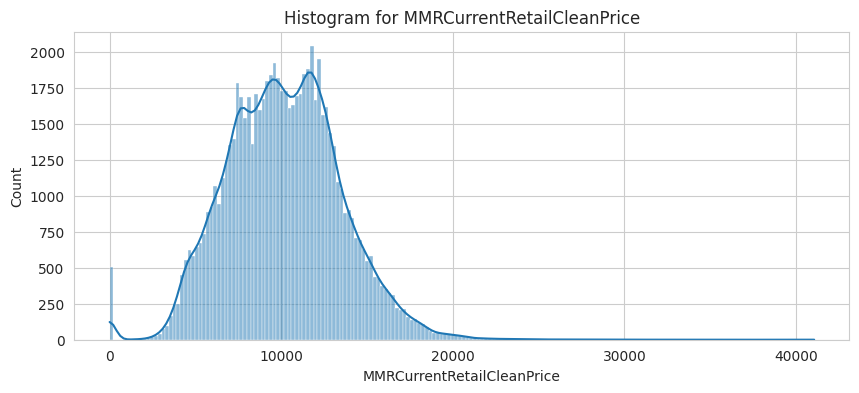

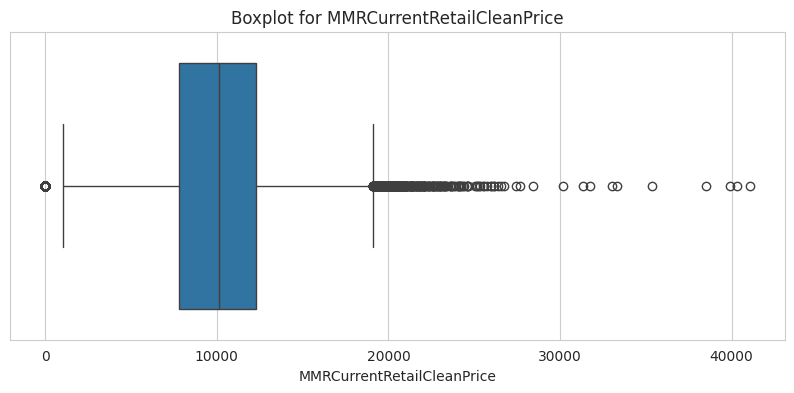

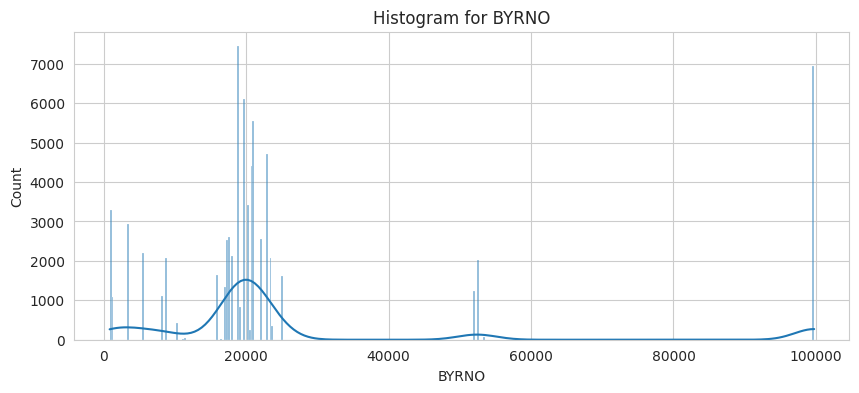

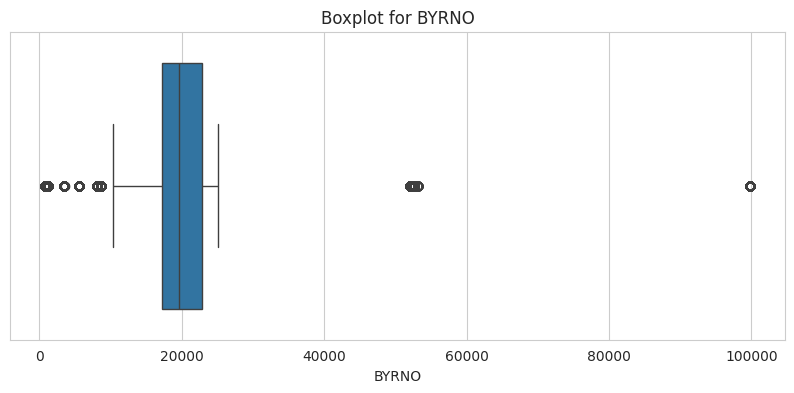

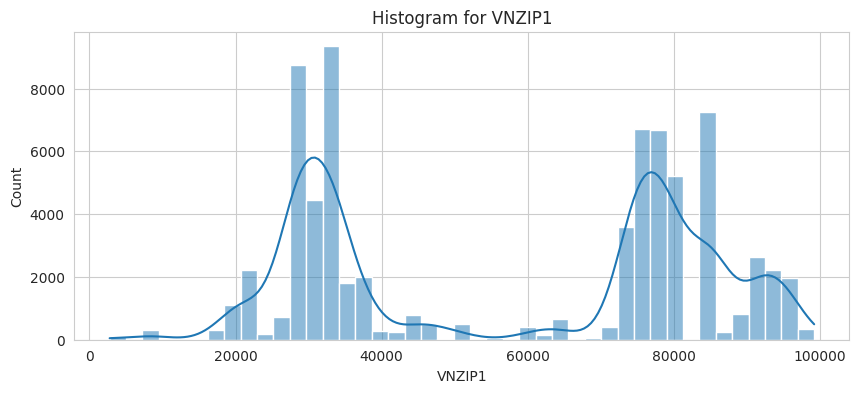

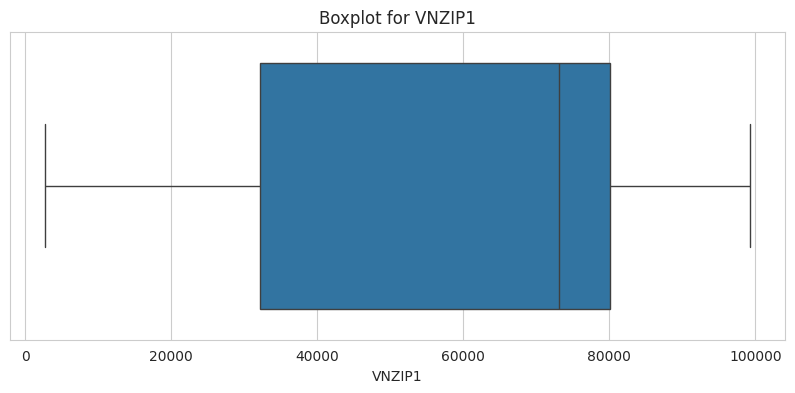

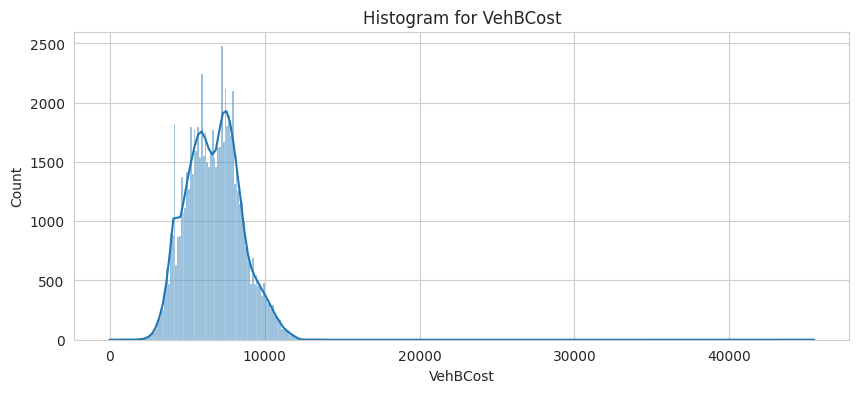

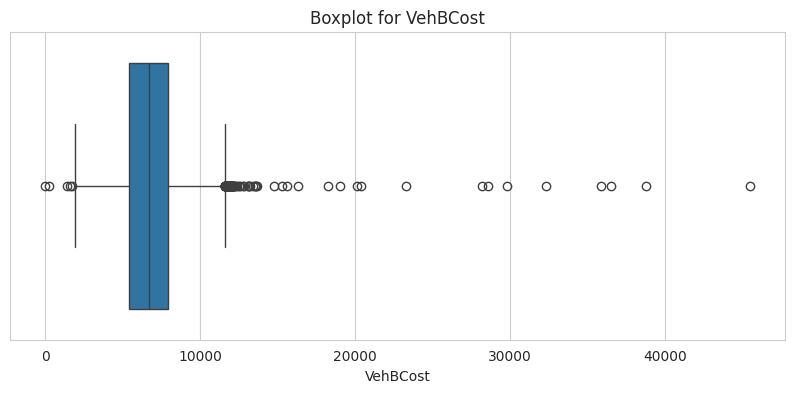

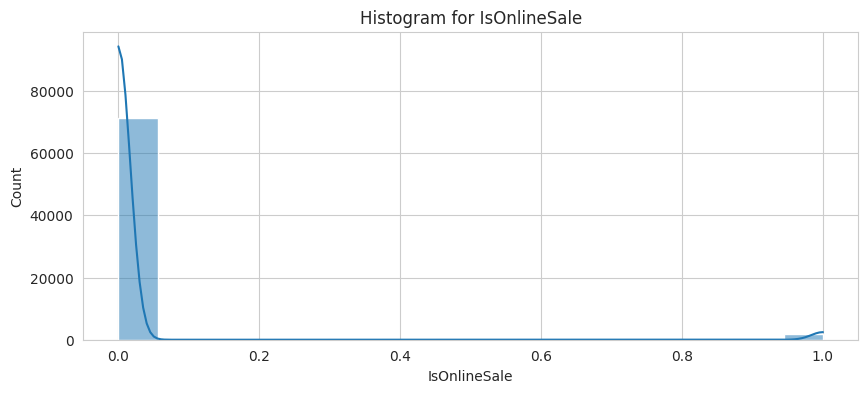

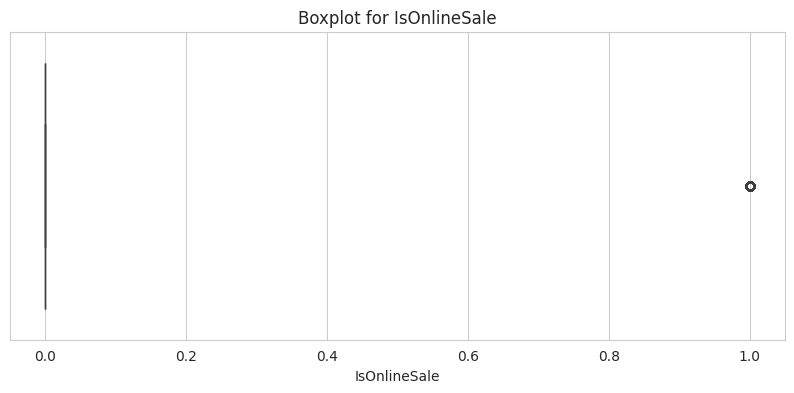

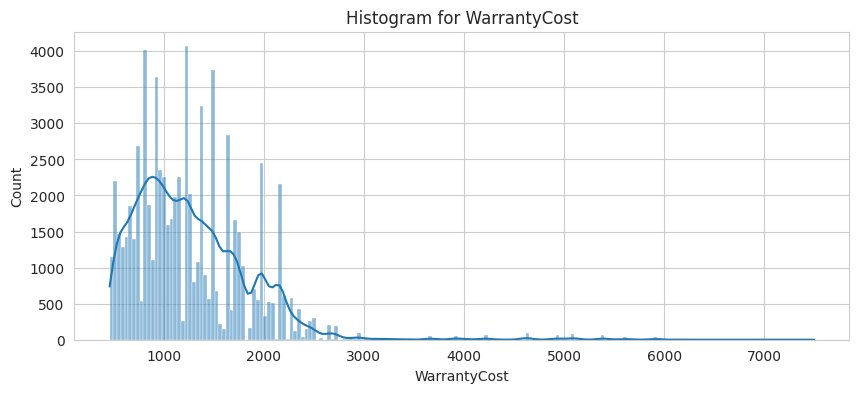

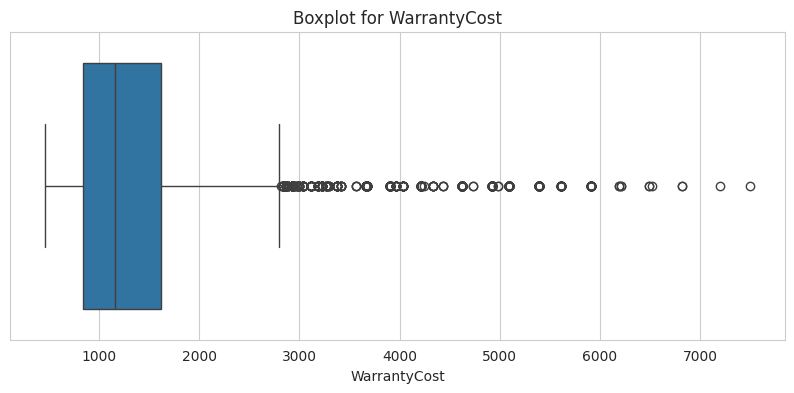

In [95]:
#Visual Methods
# Histogram for each numeric feature
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()
    
    # Boxplot for each numeric feature
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


### Hypothesis Testing

#Hypothesis Testing to view my data, to test, whether the mean of a numerical feature is equal to certain value, you can use t-test for mean or chi-squares test for frequencies

In [96]:
import scipy.stats as stats

In [97]:
# Extracting WarrantyCost for lemons and non-lemons
lemon_costs = df[df['IsBadBuy'] == 1]['WarrantyCost']
non_lemon_costs = df[df['IsBadBuy'] == 0]['WarrantyCost']

# Performing an independent t-test
t_stat, p_value = stats.ttest_ind(lemon_costs, non_lemon_costs, equal_var=False, nan_policy='omit')

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 12.651645924046807
P-value: 1.97234394538666e-36


### Decision Rule
#### Interpret the results based on the p-value:

In [98]:
# Set the significance level

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in WarrantyCost between lemons and non-lemons.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in WarrantyCost between lemons and non-lemons.")


Reject the null hypothesis: There is a significant difference in WarrantyCost between lemons and non-lemons.


## Data Visualization

### Proportion of Lemons vs. Non-Lemons by Vehicle Age

When purchasing a car, especially from an auction, one of the significant concerns is to avoid buying a "lemon"—a term used for cars that turn out to have several defects impacting their value and performance. Our dataset from car auctions includes a variable `IsBadBuy`, which indicates whether a car was a bad buy (1) or not (0).

Understanding how the age of a vehicle affects its likelihood of being a lemon can be crucial for buyers. To explore this relationship, we visualize the proportion of lemons and non-lemons across different vehicle ages using a bar plot. Here's what we do in our analysis:

1. We group the vehicles by their age and classify them as lemons (`IsBadBuy` == 1) or non-lemons (`IsBadBuy` == 0). We then count the number of vehicles in each category.

2. To compare these counts fairly across different ages, we normalize them to get proportions. This tells us, for each vehicle age, the fraction that were bad buys.

3. We create a stacked bar plot to visualize these proportions. Each bar represents an age group, and the segments within the bar show the proportion of lemons (in salmon) vs. non-lemons (in sky blue).

4. Our chart is titled 'Proportion of Lemons vs. Non-Lemons by Vehicle Age'. We clearly label the x-axis as 'Vehicle Age' and the y-axis as 'Proportion', and we include a legend that identifies the colors associated with lemons and non-lemons.

5. To ensure readability, we adjust the x-axis labels so that they are displayed horizontally.

By examining this plot, viewers can quickly assess the risk of vehicles being lemons based on their age. For example, if older vehicles have a higher salmon portion in their bars, it could indicate that they are more likely to be lemons.

This visual analysis is an essential step in pre-purchase evaluations, helping buyers to make informed decisions and potentially avoid the extra costs and hassles associated with buying a lemon.


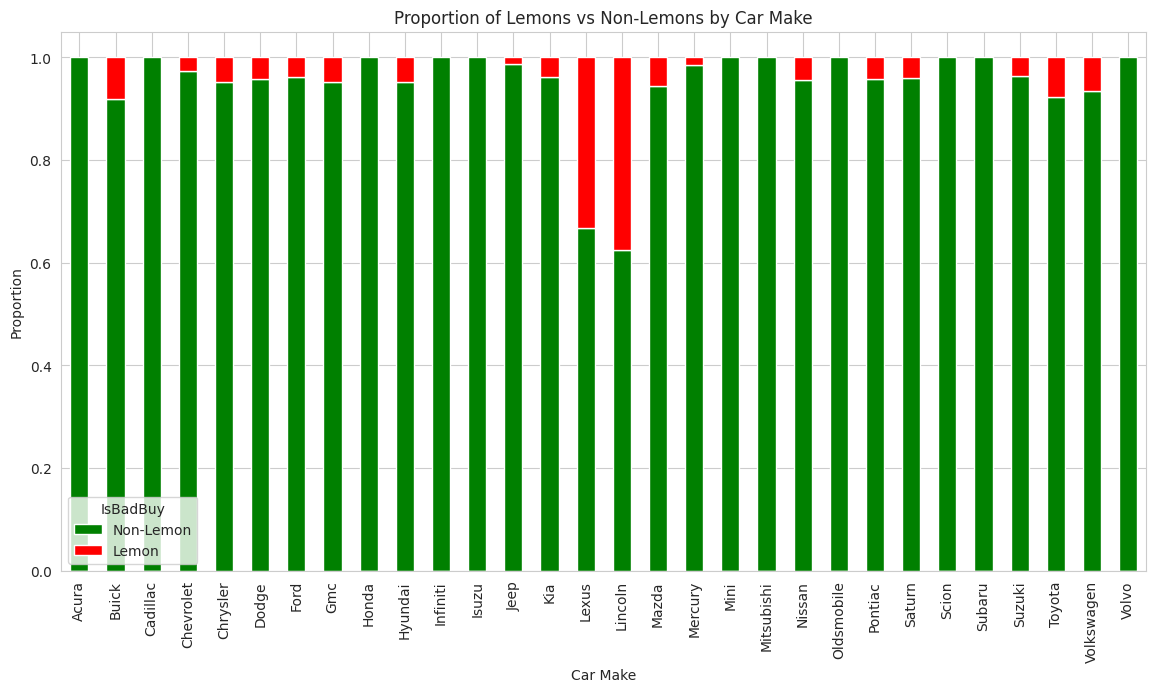

In [72]:
# Create a crosstab of Make versus IsBadBuy
make_quality_crosstab = pd.crosstab(df['Make'], df['IsBadBuy'])

# Normalize the crosstab to show proportions instead of counts
make_quality_props = make_quality_crosstab.div(make_quality_crosstab.sum(1), axis=0)

# Plot
make_quality_props.plot(kind='bar', stacked=True, figsize=(14, 7), color=['green', 'red'])
plt.title('Proportion of Lemons vs Non-Lemons by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Proportion')
plt.legend(title='IsBadBuy', labels=['Non-Lemon', 'Lemon'])
plt.xticks(rotation=90)  # Rotate the car makes for better visibility
plt.show()


### Statistical Test
#### Conducting the Chi-Square Test of Independence



In [74]:
from scipy.stats import chi2_contingency


In [75]:
chi2, p_value, dof, expected = chi2_contingency(make_quality_crosstab)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-Squared Statistic: 46.878311272373566
P-value: 0.01915396520170629


In [43]:
# For numerical data - mean imputation
df['VehicleAge'] = df['VehicleAge'].fillna(df['VehicleAge'].mean())
# For categorical data - mode imputation
df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode()[0])


In [44]:
#Mean/Median/Mode Imputation

df['VehicleAge'] = df['VehicleAge'].fillna(df['VehicleAge'].mean())


In [45]:
#Predictive Imputation
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Example for a numerical column with other numerical predictors
# Let's assume 'WarrantyCost' is what you want to impute using 'VehicleAge' and 'VehOdo' as predictors
X = df[['VehicleAge', 'VehOdo']]
y = df['WarrantyCost'].dropna()  # Ensure target vector doesn't have NaN

# Create a pipeline that first imputes missing values using the mean, then fits a linear model
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())
model = pipeline.fit(X, y)
df['WarrantyCost'] = model.predict(X)


In [46]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
       'SubModel_reduced', 'PurchYear'],
      dtype='object')

In [47]:
# Convert PurchDate to datetime
df['PurchDate'] = pd.to_datetime(df['PurchDate'])

# Example: Calculate the number of days since purchase (assuming 'today' is the date of analysis)
df['DaysSincePurchase'] = (pd.to_datetime('today') - df['PurchDate']).dt.days


In [48]:


# Display the first few rows of the DataFrame
df.head()

# Summary of the DataFrame, including the data types and number of non-null values
df.info()

# Summary statistics for numeric columns
df.describe()

# Count of missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72983 non-null  int64         
 1   IsBadBuy                           72983 non-null  int64         
 2   PurchDate                          72983 non-null  datetime64[ns]
 3   Auction                            72983 non-null  object        
 4   VehYear                            72983 non-null  int64         
 5   VehicleAge                         72983 non-null  int64         
 6   Make                               72983 non-null  object        
 7   Model                              72983 non-null  object        
 8   Trim                               70623 non-null  object        
 9   SubModel                           72975 non-null  object        
 10  Color                             

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             0
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

Visual Exploration of Individual Variables

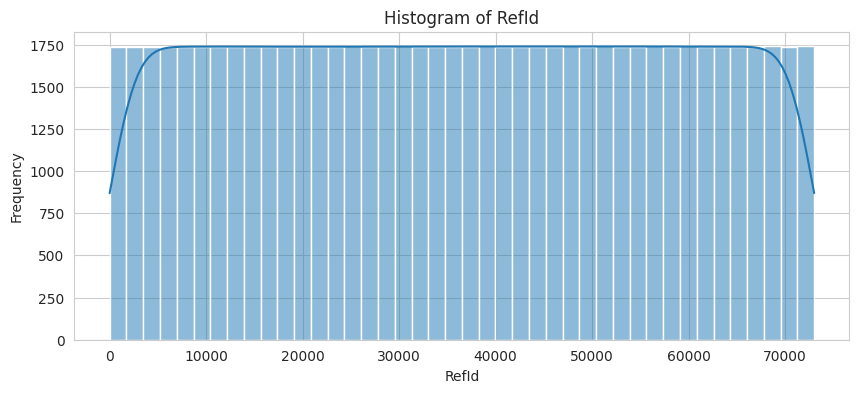

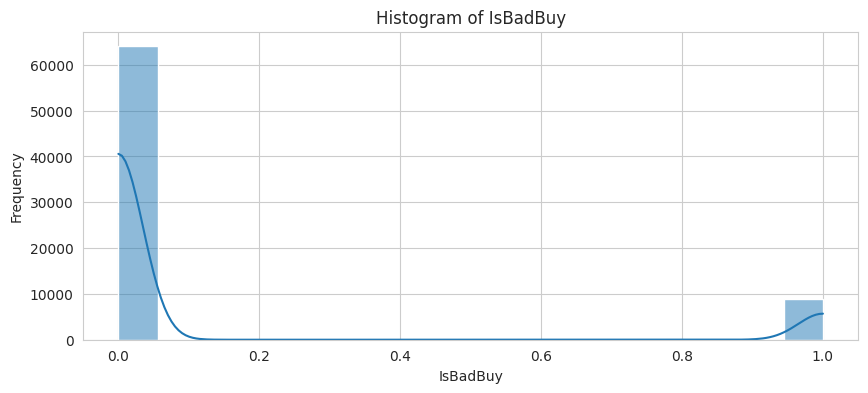

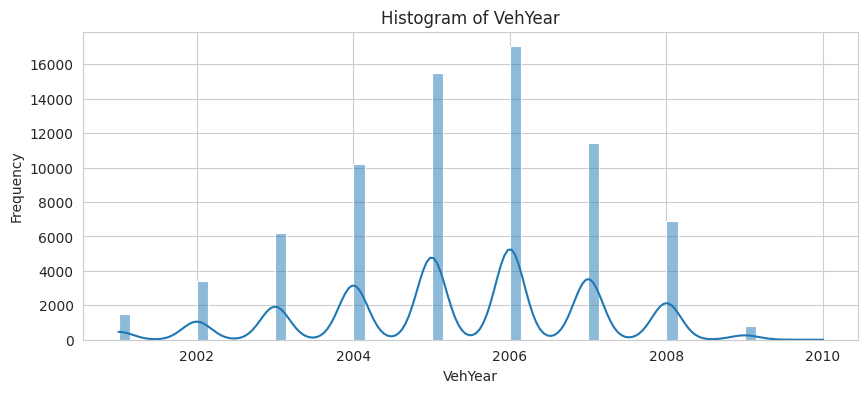

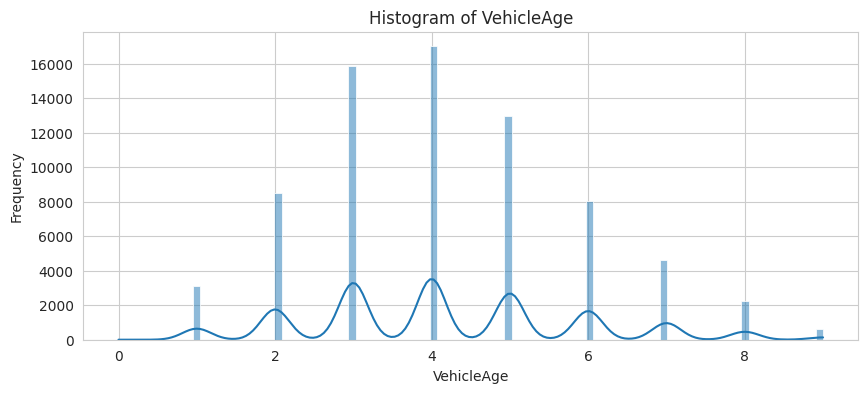

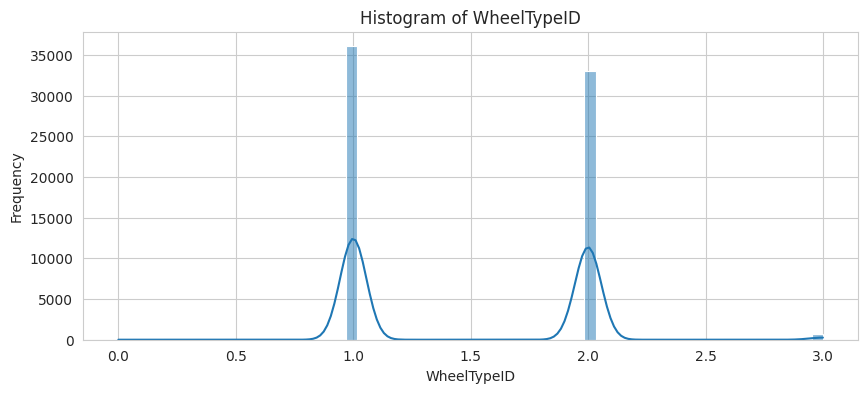

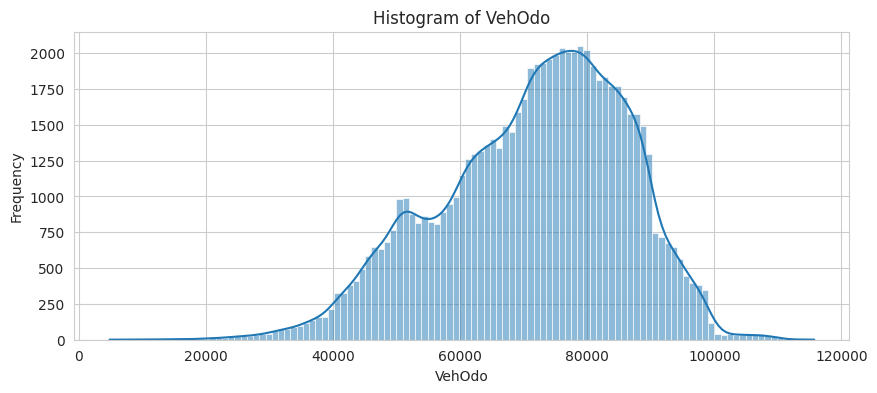

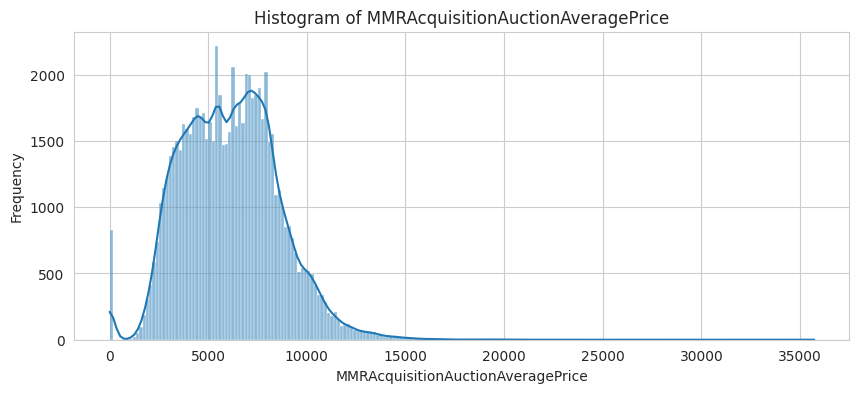

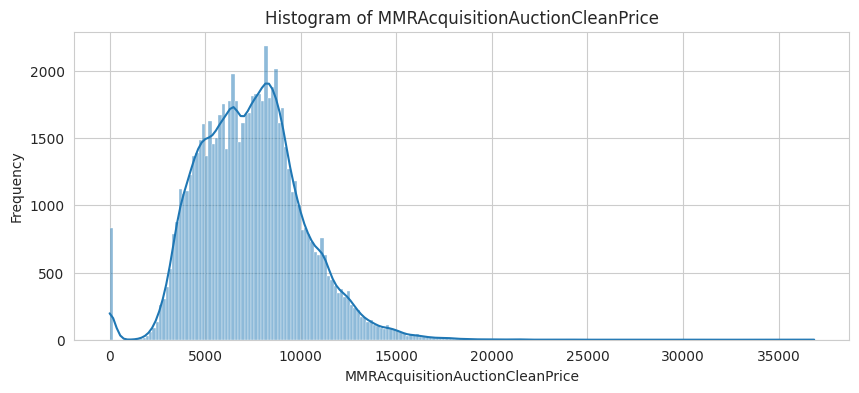

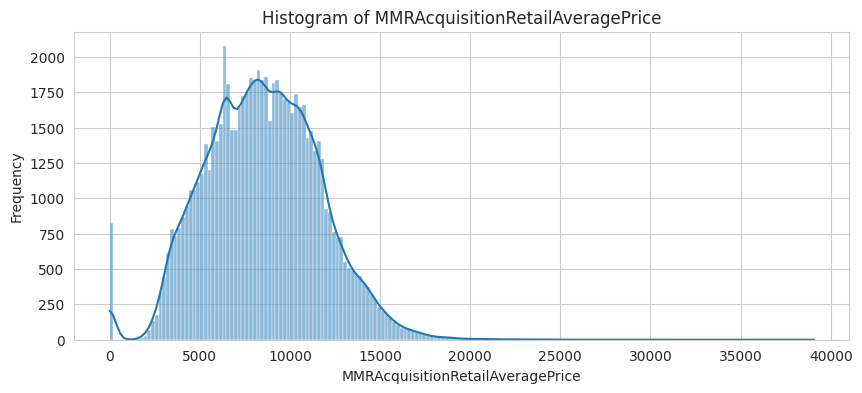

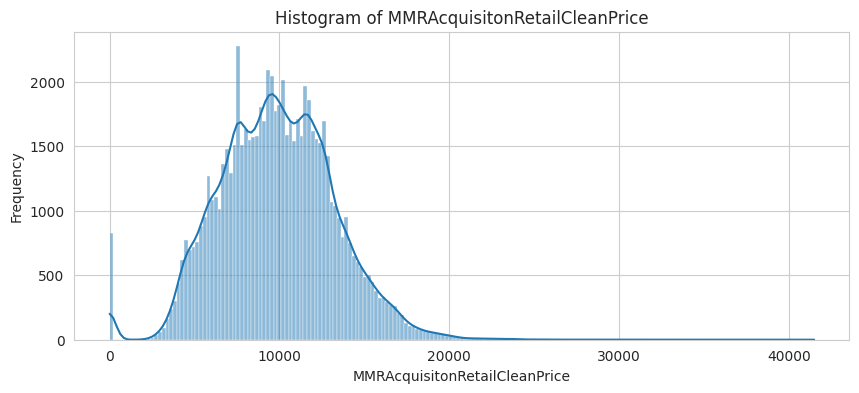

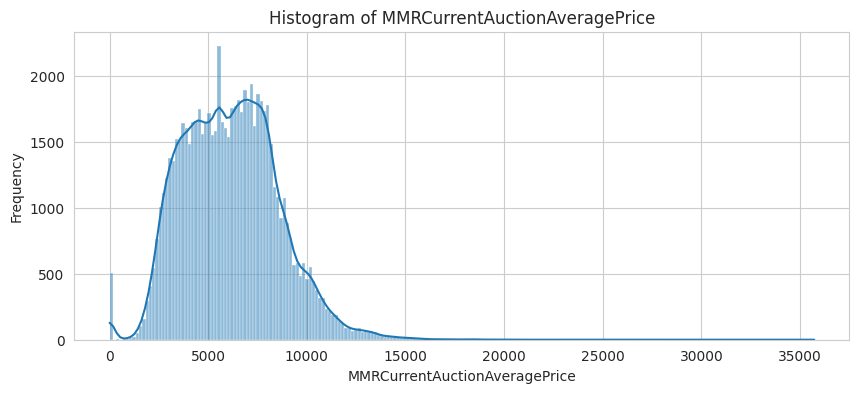

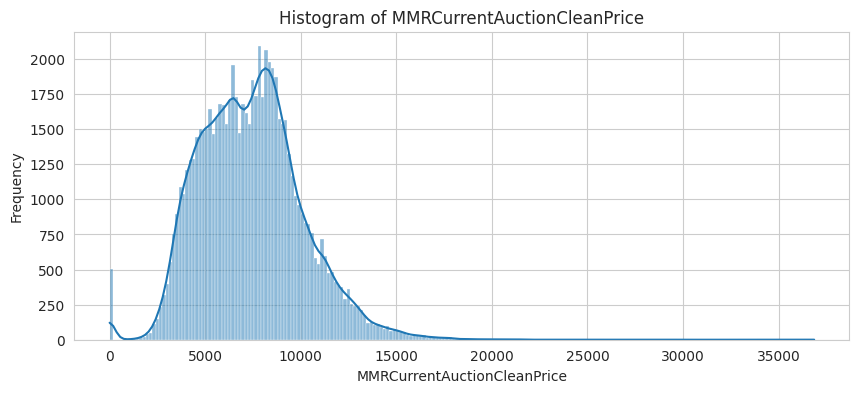

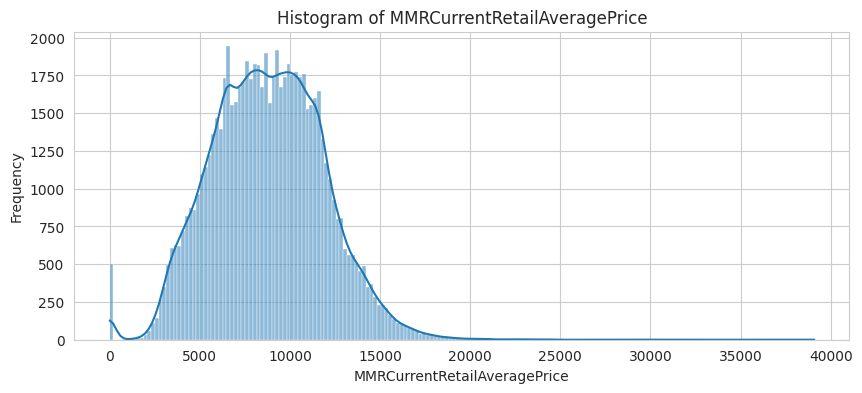

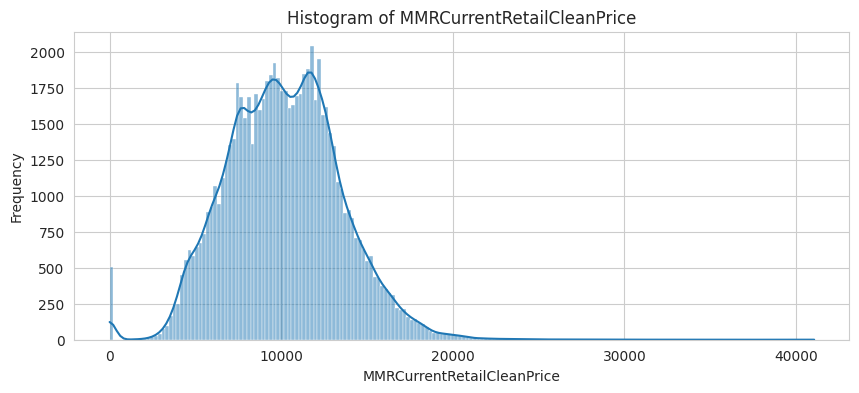

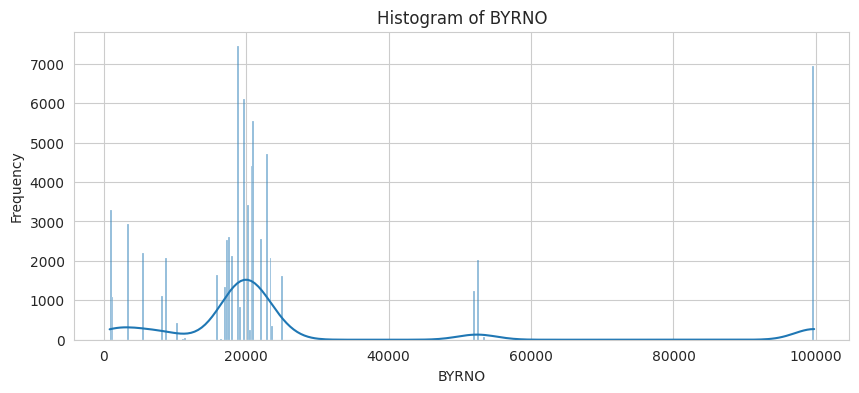

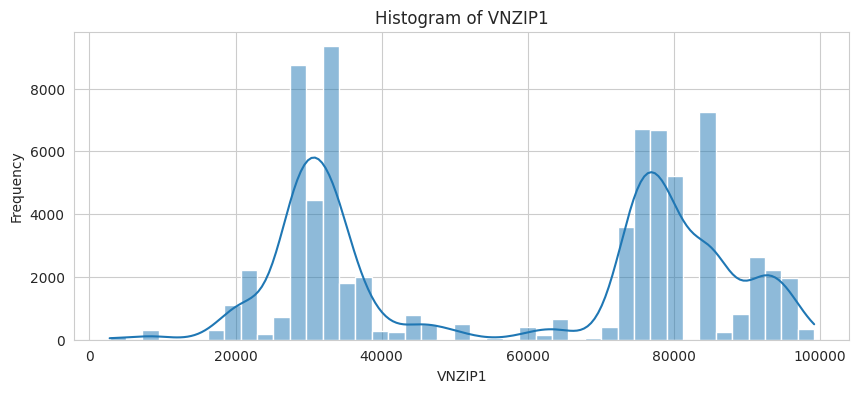

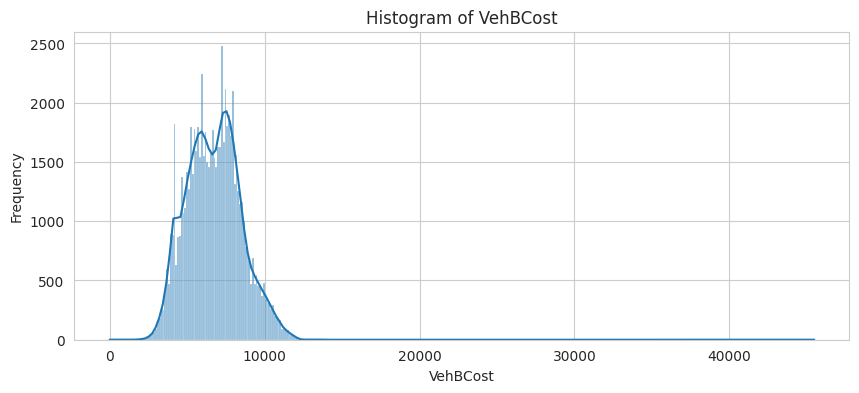

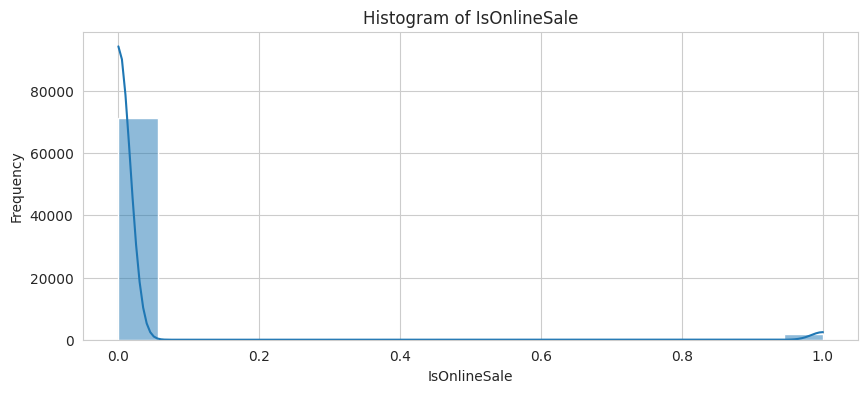

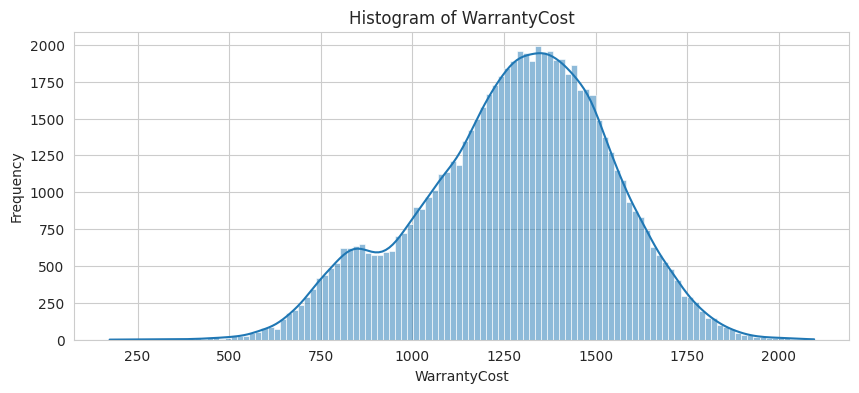

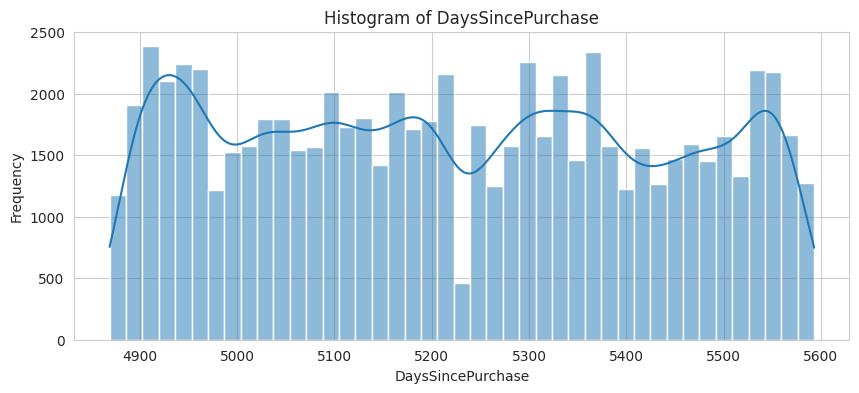

In [49]:
#Histograms for Numeric Variables


# Plot histograms for all numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


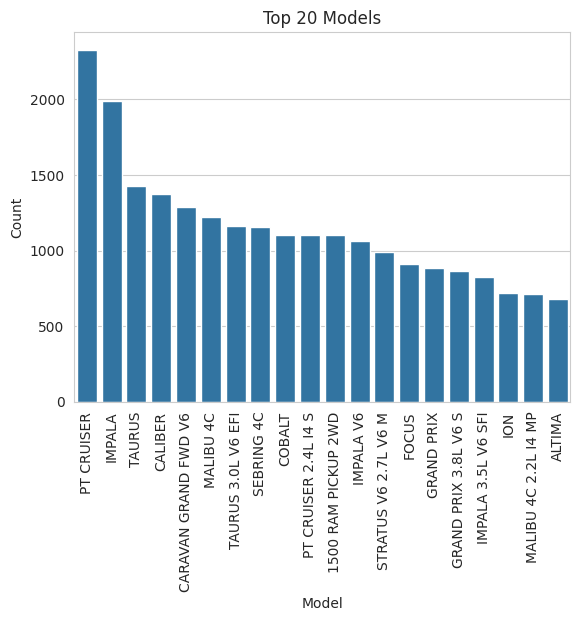

In [50]:
top_n = df['Model'].value_counts().head(20)  # Adjust N as needed
sns.barplot(x=top_n.index, y=top_n.values)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Top 20 Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

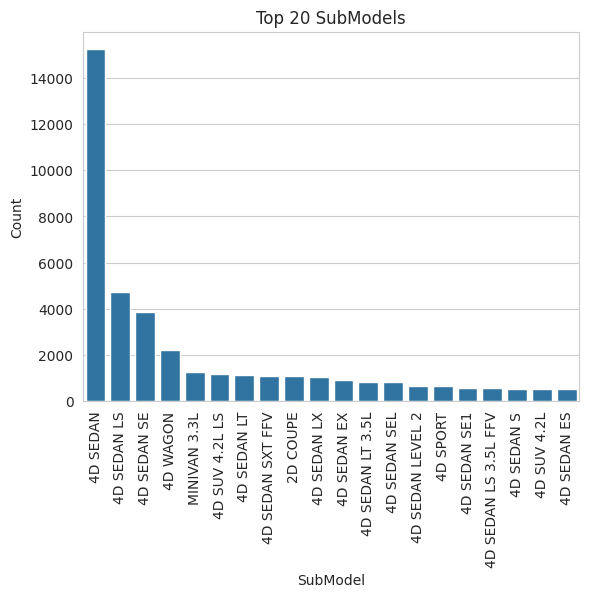

In [51]:
top_n = df['SubModel'].value_counts().head(20)  # Adjust N as needed
sns.barplot(x=top_n.index, y=top_n.values)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Top 20 SubModels')
plt.xlabel('SubModel')
plt.ylabel('Count')
plt.show()

Limit to Top Categories: If there are a lot of unique 'Trim' values, only show the top ones.

/tmp/ipykernel_3968/3320595477.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_trims.index, y=top_trims.values, palette='viridis')


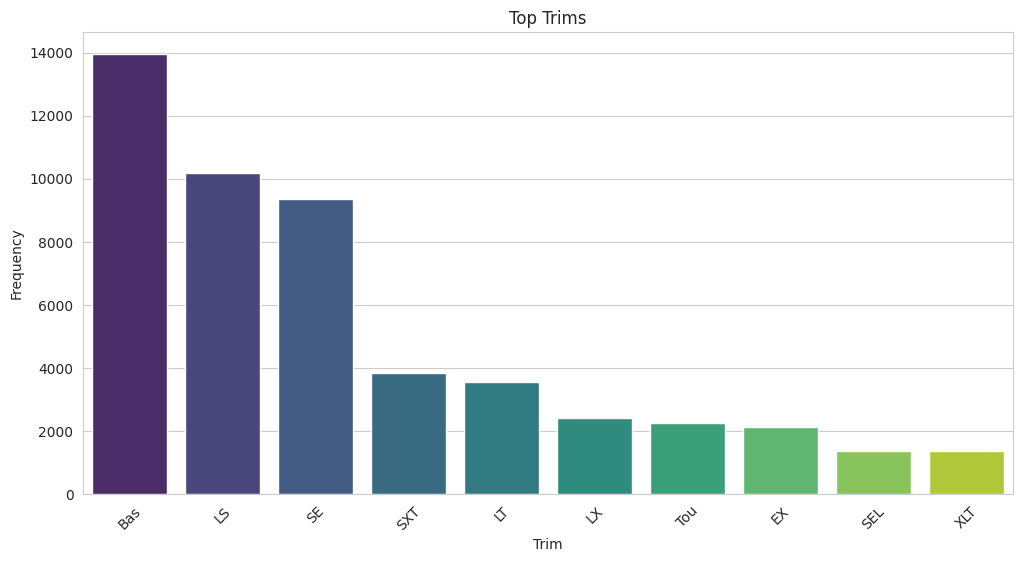

In [52]:
# Get the counts of each category
trim_counts = df['Trim'].value_counts()

# Select the top N
top_trims = trim_counts.head(10)  # Adjust the number 10 to display more or fewer categories

# Create a bar plot for the top N categories
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility
sns.barplot(x=top_trims.index, y=top_trims.values, palette='viridis')
plt.title('Top Trims')
plt.xlabel('Trim')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate for better label readability
plt.show()


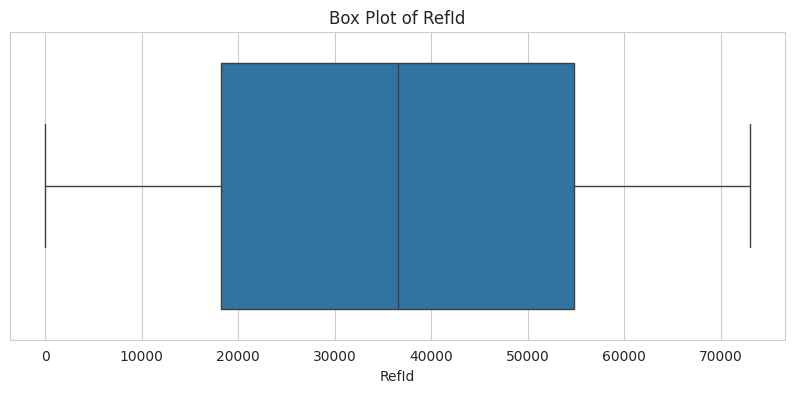

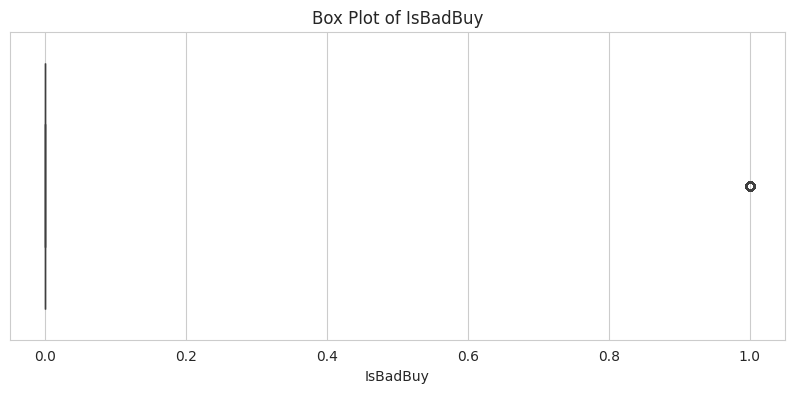

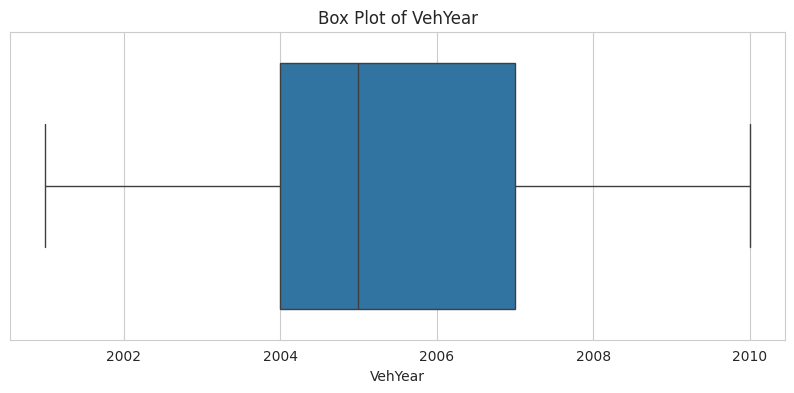

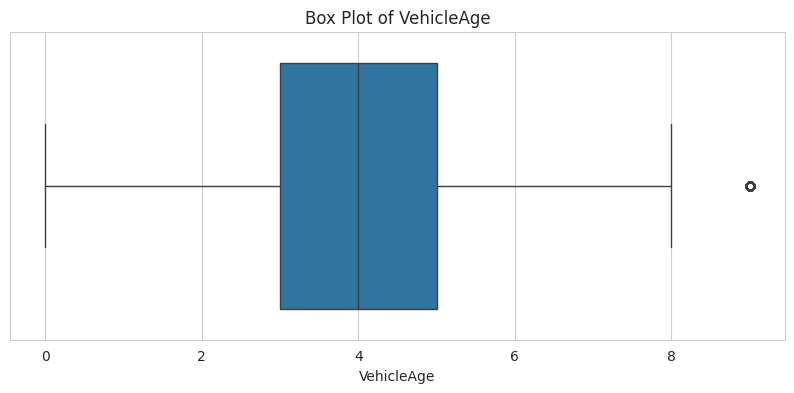

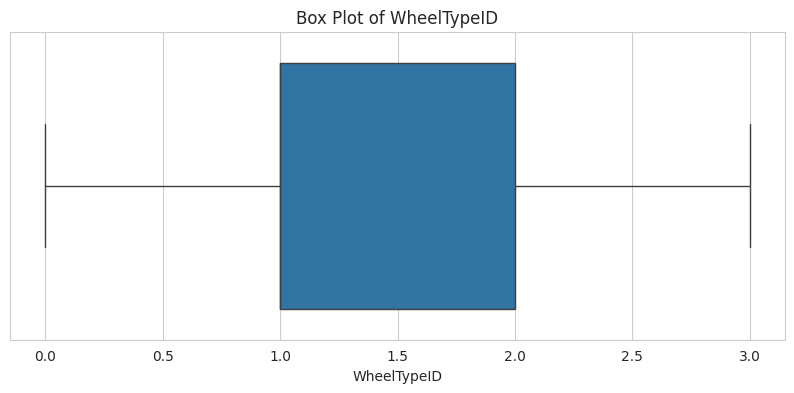

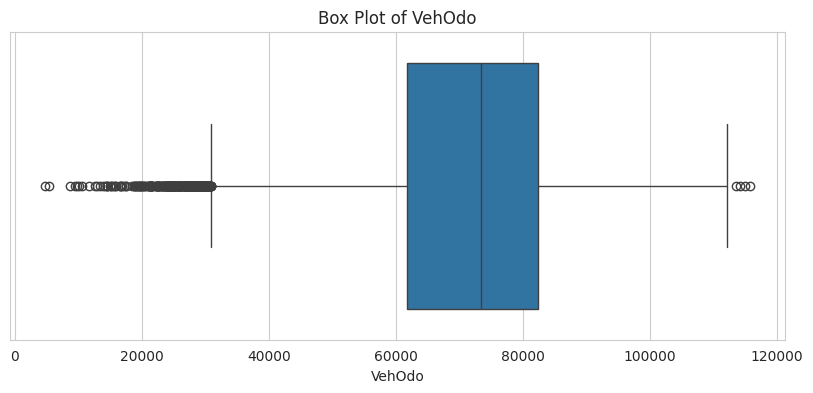

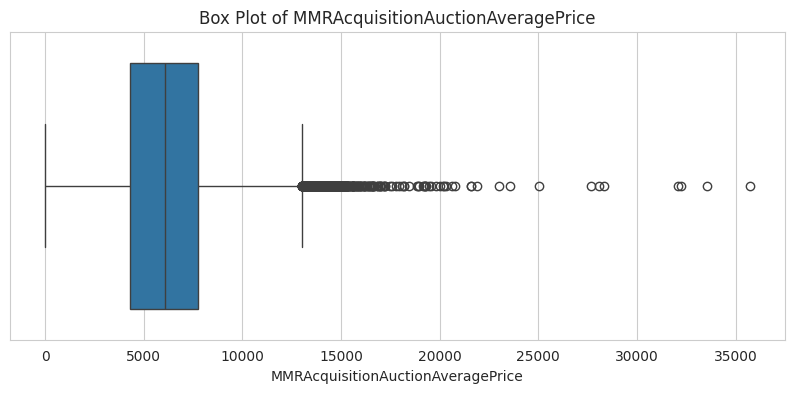

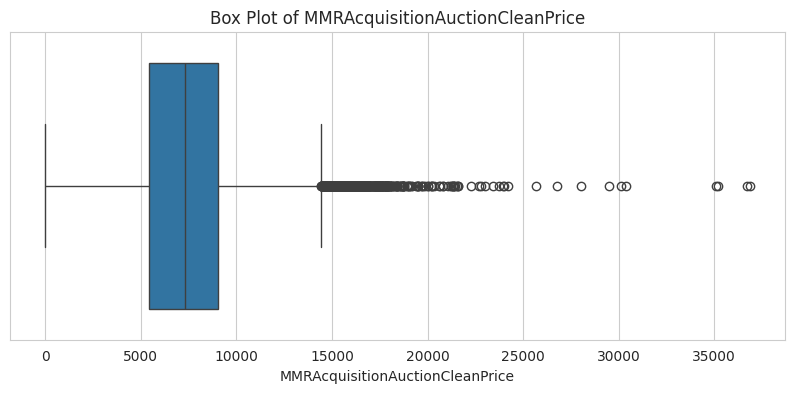

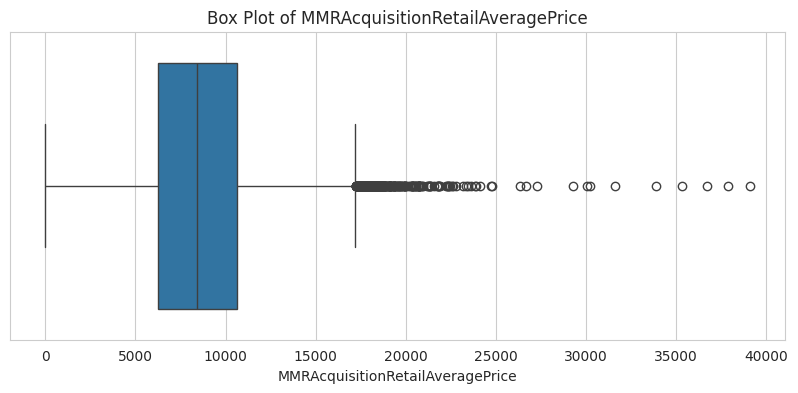

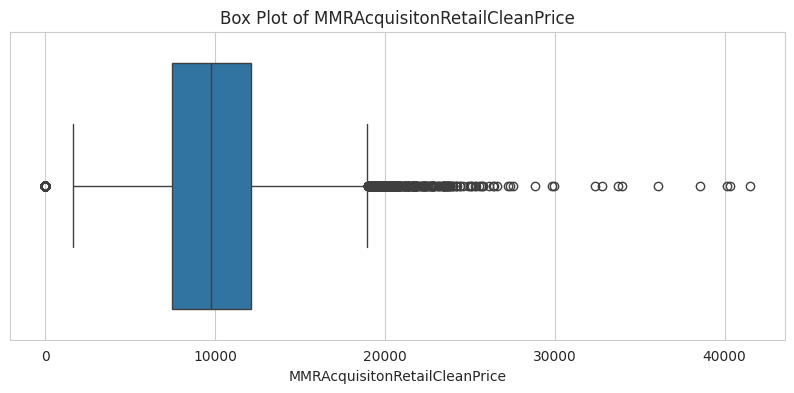

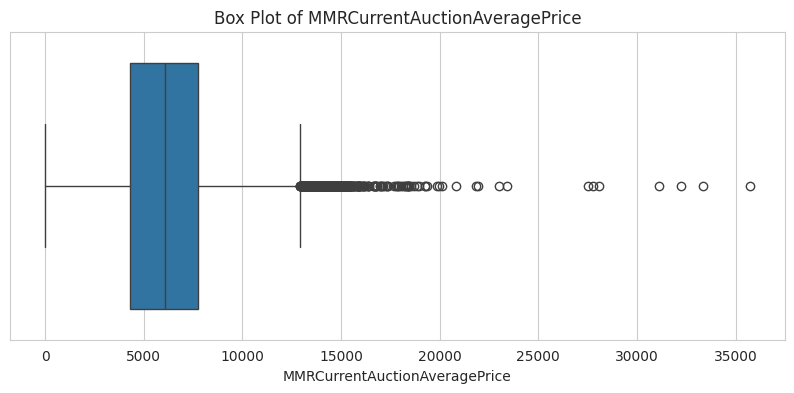

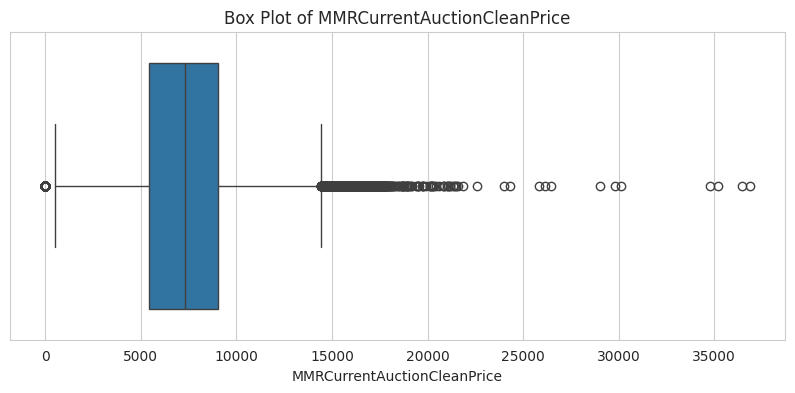

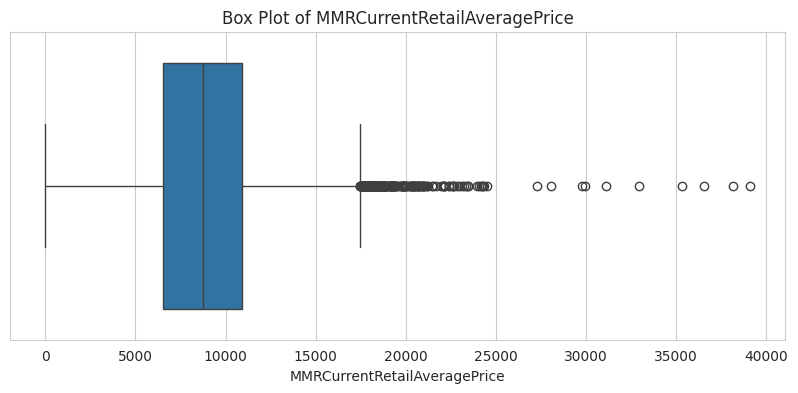

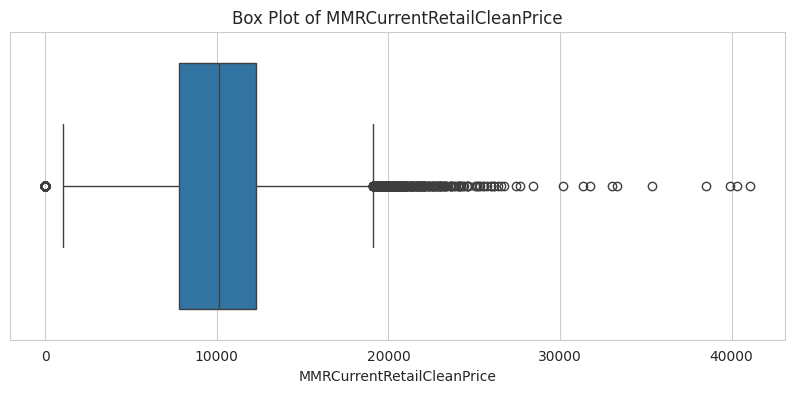

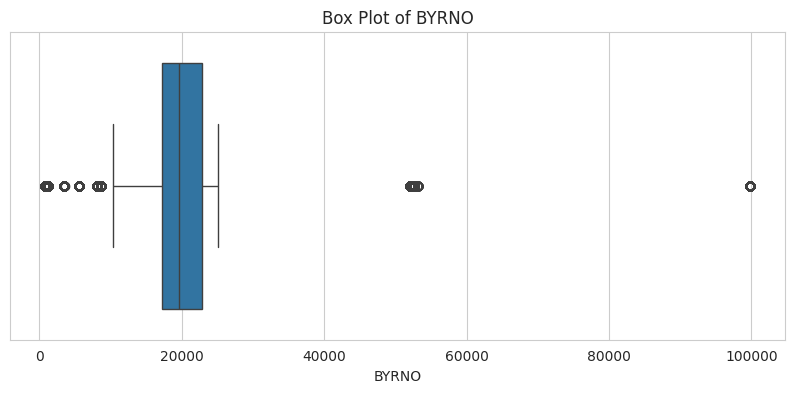

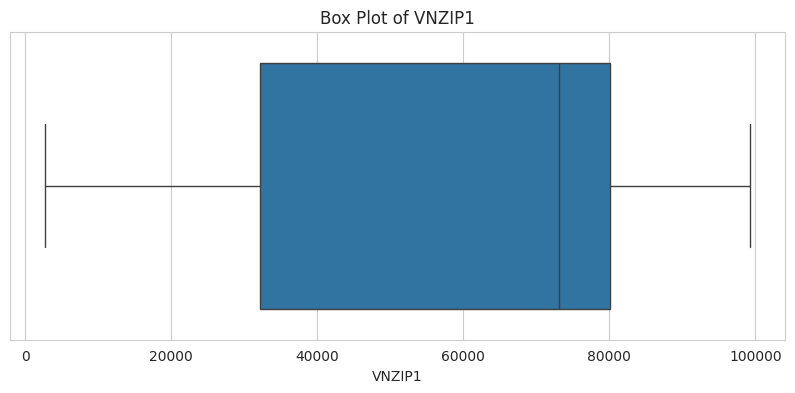

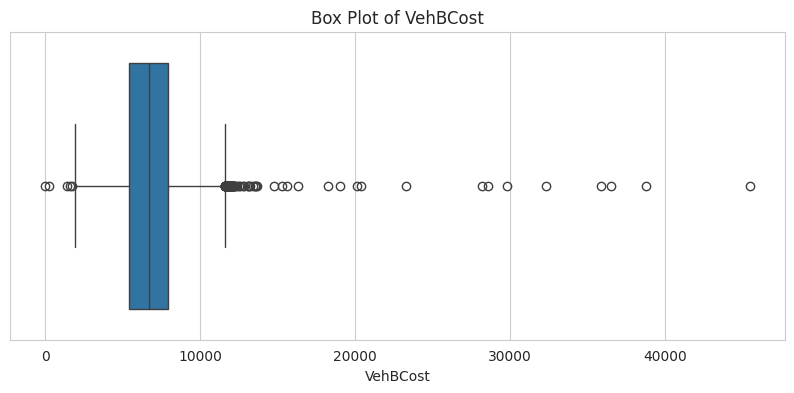

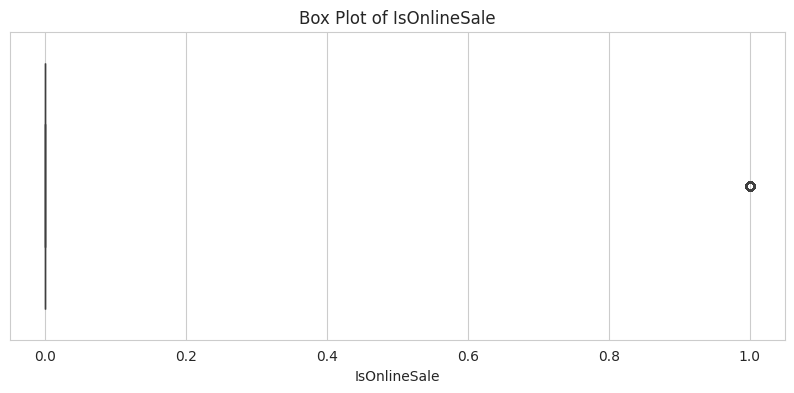

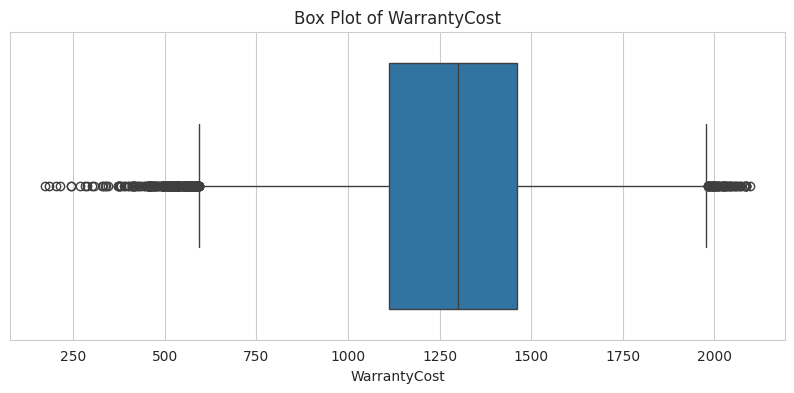

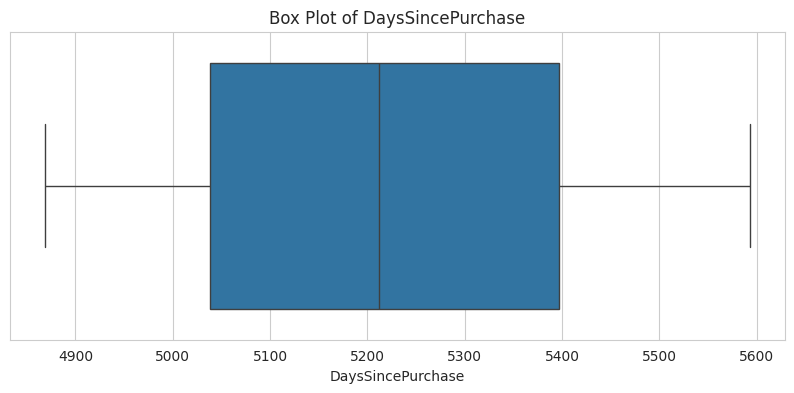

In [53]:
# Box plots for detecting outliers in numerical variables
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


## Section 3: Data Cleaning

#### Analysis of Missing Values


### Visualize this as a bar chart (Question for Eric and Isabelle, are those two first c)

Percentage of Missing Data by Column:
                                   MissingPercentage
PRIMEUNIT                                  95.315347
AUCGUART                                   95.315347
WheelType                                   4.348958
WheelTypeID                                 4.342107
Trim                                        3.233630
MMRCurrentRetailAveragePrice                0.431607
MMRCurrentAuctionAveragePrice               0.431607
MMRCurrentAuctionCleanPrice                 0.431607
MMRCurrentRetailCleanPrice                  0.431607
MMRAcquisitionAuctionCleanPrice             0.024663
MMRAcquisitonRetailCleanPrice               0.024663
MMRAcquisitionAuctionAveragePrice           0.024663
MMRAcquisitionRetailAveragePrice            0.024663
Color                                       0.010961
SubModel                                    0.010961
Size                                        0.006851
Nationality                                 0.006851
TopThree

<Figure size 1000x600 with 0 Axes>

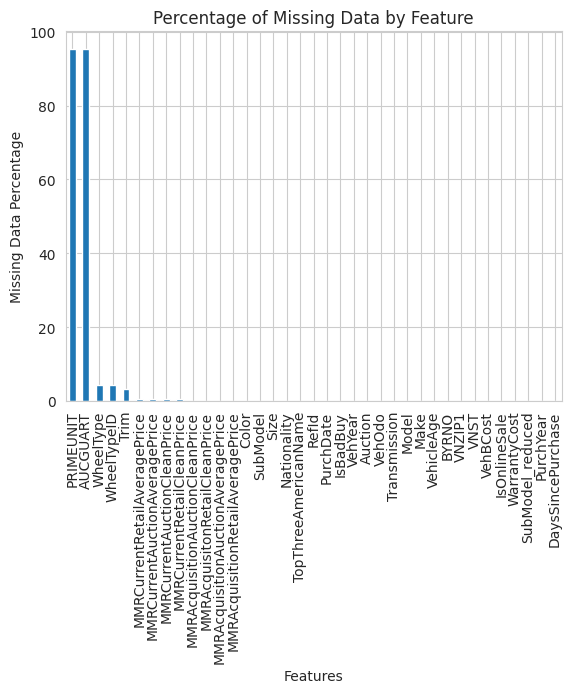

In [54]:
# Calculate the percentage of missing data for each feature
missing_data = df.isnull().mean() * 100

# Sort the missing data in descending order
missing_data_sorted = missing_data.sort_values(ascending=False)

# Convert to a DataFrame for pretty printing
missing_data_df = pd.DataFrame(missing_data_sorted, columns=['MissingPercentage'])

# Display the percentage of missing data
print("Percentage of Missing Data by Column:")
print(missing_data_df)

# Optionally, you can visualize this as a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size to fit your dataset
missing_data_df.plot(kind='bar', legend=False)
plt.title('Percentage of Missing Data by Feature')
plt.xlabel('Features')
plt.ylabel('Missing Data Percentage')
plt.show()


### Relationships Among Variables

In [55]:
# finding duplicates
duplicates = df.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
72978    False
72979    False
72980    False
72981    False
72982    False
Length: 72983, dtype: bool

In [56]:
# Mark all duplicates, including their first occurrence
all_duplicates = df.duplicated(keep=False)
duplicate_rows = df[all_duplicates]
print(duplicate_rows)


Empty DataFrame
Columns: [RefId, IsBadBuy, PurchDate, Auction, VehYear, VehicleAge, Make, Model, Trim, SubModel, Color, Transmission, WheelTypeID, WheelType, VehOdo, Nationality, Size, TopThreeAmericanName, MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice, MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice, PRIMEUNIT, AUCGUART, BYRNO, VNZIP1, VNST, VehBCost, IsOnlineSale, WarrantyCost, SubModel_reduced, PurchYear, DaysSincePurchase]
Index: []


### No duplicates found in dataset

In [57]:

duplicate_rows = df[duplicates]

# To see the duplicate rows
duplicate_rows



Empty DataFrame
Columns: [RefId, IsBadBuy, PurchDate, Auction, VehYear, VehicleAge, Make, Model, Trim, SubModel, Color, Transmission, WheelTypeID, WheelType, VehOdo, Nationality, Size, TopThreeAmericanName, MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice, MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice, PRIMEUNIT, AUCGUART, BYRNO, VNZIP1, VNST, VehBCost, IsOnlineSale, WarrantyCost, SubModel_reduced, PurchYear, DaysSincePurchase]
Index: []

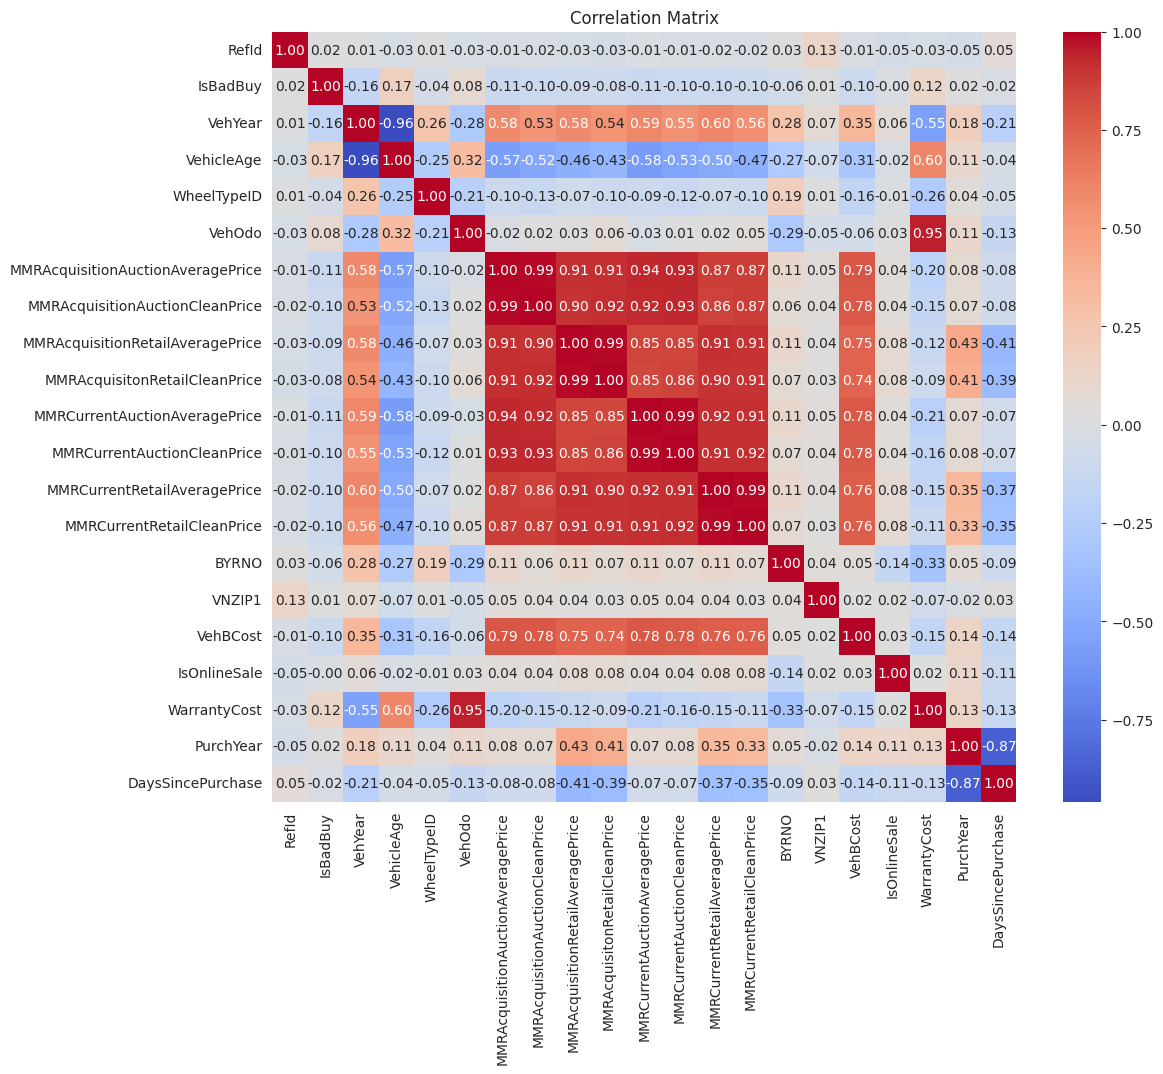

In [58]:
# Select only numeric data types for the correlation matrix
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])

# Now use the numeric_df for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Step 5: Perform a full EDA

### Missing Values
### From the data I noticed columns with missing values include Trim, SubModel, Color, WheelTypeID, WheelType, Nationality, Size, TopThreeAmericanName, and various MMR attributes. I am selecting the several options for handling these:

In [59]:
#Option 1
# Mean or median imputation for numeric columns
df['WheelTypeID'].fillna(df['WheelTypeID'].mean(), inplace=True)

# Mode imputation for categorical columns
df['Trim'].fillna(df['Trim'].mode()[0], inplace=True)
df['SubModel'].fillna(df['SubModel'].mode()[0], inplace=True)
# ... continue for other columns



/tmp/ipykernel_3968/3041069847.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WheelTypeID'].fillna(df['WheelTypeID'].mean(), inplace=True)
/tmp/ipykernel_3968/3041069847.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [60]:
# Drop columns with too many missing values
df.drop(['Trim', 'WheelType'], axis=1, inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)


In [61]:
#Outliers
from scipy import stats
import numpy as np

# Calculate Z-scores of 'VehOdo'
z_scores = stats.zscore(df['VehOdo'])
abs_z_scores = np.abs(z_scores)

# Filter out rows with Z-scores greater than 3 (or another threshold)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

df

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
275      276         0 2010-10-04   ADESA     2003           7    HYUNDAI   
290      291         0 2010-10-11   ADESA     2005           5  CHEVROLET   
297      298         0 2010-10-18   ADESA     2006           4  CHEVROLET   
305      306         0 2010-10-25   ADESA     2004           6   CHRYSLER   
314      315         0 2010-10-25   ADESA     2002           8    MERCURY   
...      ...       ...        ...     ...      ...         ...        ...   
72382  72414         0 2010-12-16   ADESA     2003           7   CHRYSLER   
72384  72416         0 2010-12-23   ADESA     2003           7      DODGE   
72385  72417         0 2010-12-23   ADESA     2002           8       FORD   
72386  72418         0 2010-12-23   ADESA     2004           6   CHRYSLER   
72387  72419         0 2010-12-23   ADESA     2005           5  CHEVROLET   

                      Model             SubModel  Color Transmission  \
275                  ACCENT          4D SEDAN GL   BLUE       MANUAL   
290    1500 SILVERADO PICKU         REG CAB 4.3L   GREY       MANUAL   
297          EQUINOX FWD V6            4D SUV LS   GREY         AUTO   
305              PT CRUISER             4D SEDAN   BLUE         AUTO   
314                   SABLE  4D SEDAN LS PREMIUM  GREEN         AUTO   
...                     ...                  ...    ...          ...   
72382            PT CRUISER     4D SEDAN LIMITED  BLACK         AUTO   
72384        DURANGO 2WD V8      4D SUV 5.9L SLT    RED         AUTO   
72385                 FOCUS          4D SEDAN SE   BLUE         AUTO   
72386            SEBRING V6   2D CONVERTIBLE GTC  WHITE         AUTO   
72387                  AVEO             4D SEDAN    RED         AUTO   

       WheelTypeID  VehOdo  Nationality         Size TopThreeAmericanName  \
275            2.0   55756  OTHER ASIAN      COMPACT                OTHER   
290            1.0   43795     AMERICAN  LARGE TRUCK                   GM   
297            2.0   63908     AMERICAN   MEDIUM SUV                   GM   
305            2.0   76895     AMERICAN       MEDIUM             CHRYSLER   
314            1.0   94898     AMERICAN       MEDIUM                 FORD   
...            ...     ...          ...          ...                  ...   
72382          3.0  102185     AMERICAN       MEDIUM             CHRYSLER   
72384          1.0   92427     AMERICAN   MEDIUM SUV             CHRYSLER   
72385          1.0   78577     AMERICAN      COMPACT                 FORD   
72386          1.0   91338     AMERICAN       MEDIUM             CHRYSLER   
72387          1.0   85493     AMERICAN      COMPACT                   GM   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
275                               2089.0                           3183.0   
290                               4833.0                           6545.0   
297                               8210.0                           9827.0   
305                               3313.0                           4370.0   
314                               2756.0                           3804.0   
...                                  ...                              ...   
72382                             3057.0                           4032.0   
72384                             3324.0                           4805.0   
72385                             2271.0                           3050.0   
72386                             3421.0                           4901.0   
72387                             2824.0                           3581.0   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
275                              5030.0                         7665.0   
290                              8536.0                        10540.0   
297                             12160.0                        13819.0   
305                              6417.0                         7699.0 

In [62]:
#Errors in the Dataset
# I need to identify errors manually and decide on the appropriate course of action. 
# If 'BYRNO' should be an integer but is stored as a float
df['BYRNO'] = df['BYRNO'].astype(int)

# If 'Auction' contains a typo
df['Auction'] = df['Auction'].replace('ADESA', 'Adesa')


/tmp/ipykernel_3968/3249446399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BYRNO'] = df['BYRNO'].astype(int)
/tmp/ipykernel_3968/3249446399.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Auction'] = df['Auction'].replace('ADESA', 'Adesa')


In [63]:
#Data Consistency
# Convert 'PurchDate' to datetime if it's not already
df['PurchDate'] = pd.to_datetime(df['PurchDate'])

# Convert strings to title case for consistency
df['Make'] = df['Make'].str.title()
df['Model'] = df['Model'].str.title()
# ... continue for other string columns


/tmp/ipykernel_3968/172147671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PurchDate'] = pd.to_datetime(df['PurchDate'])
/tmp/ipykernel_3968/172147671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'] = df['Make'].str.title()
/tmp/ipykernel_3968/172147671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [64]:
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 3388 entries, 275 to 72387
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              3388 non-null   int64         
 1   IsBadBuy                           3388 non-null   int64         
 2   PurchDate                          3388 non-null   datetime64[ns]
 3   Auction                            3388 non-null   object        
 4   VehYear                            3388 non-null   int64         
 5   VehicleAge                         3388 non-null   int64         
 6   Make                               3388 non-null   object        
 7   Model                              3388 non-null   object        
 8   SubModel                           3388 non-null   object        
 9   Color                              3388 non-null   object        
 10  Transmission                       338

##

/tmp/ipykernel_3968/3538271216.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PurchDate'] = pd.to_datetime(df['PurchDate'])


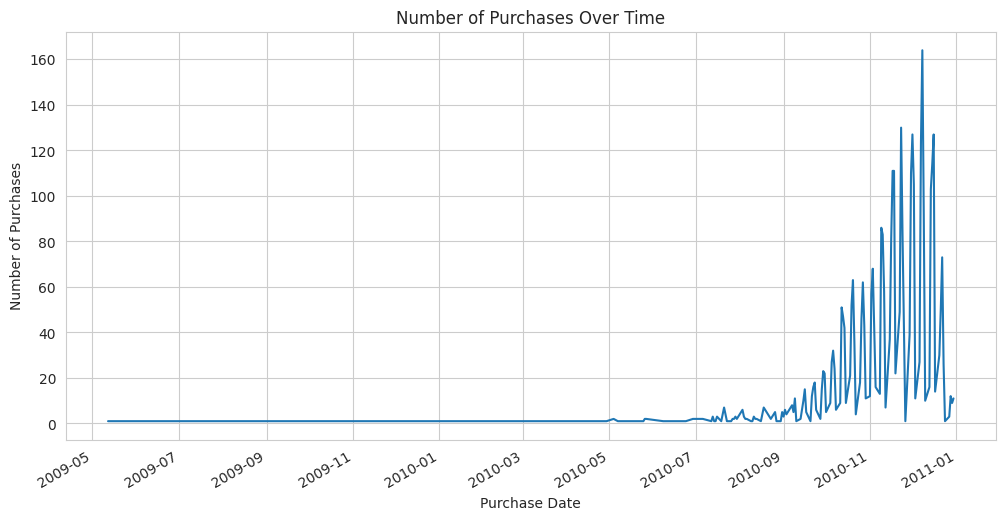

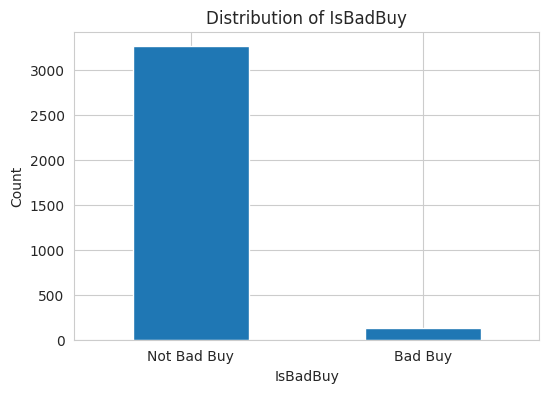

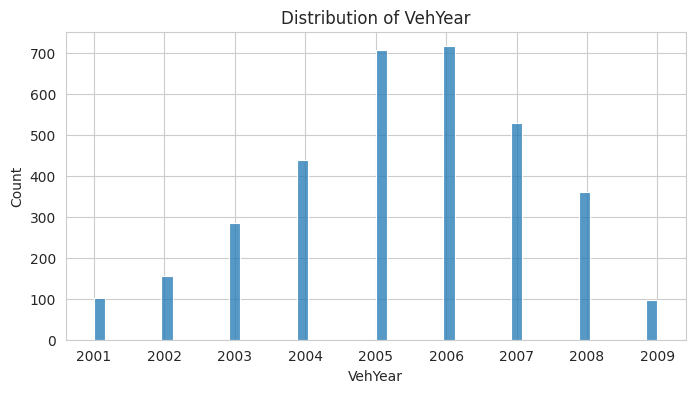

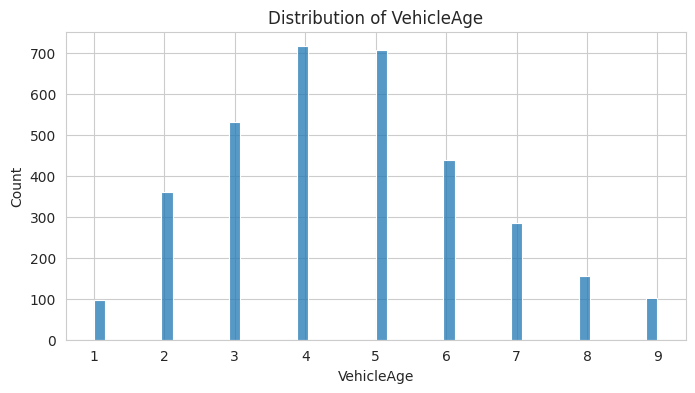

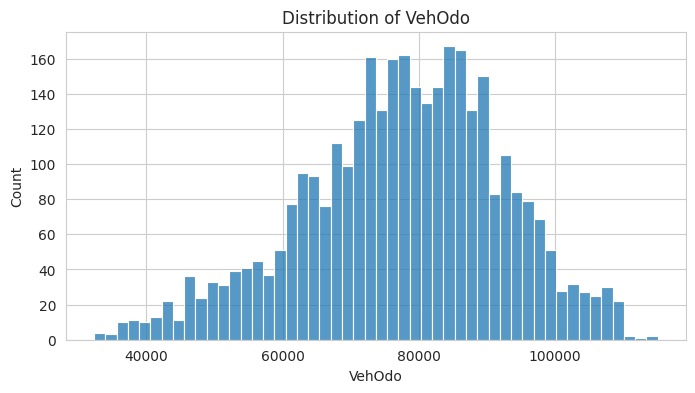

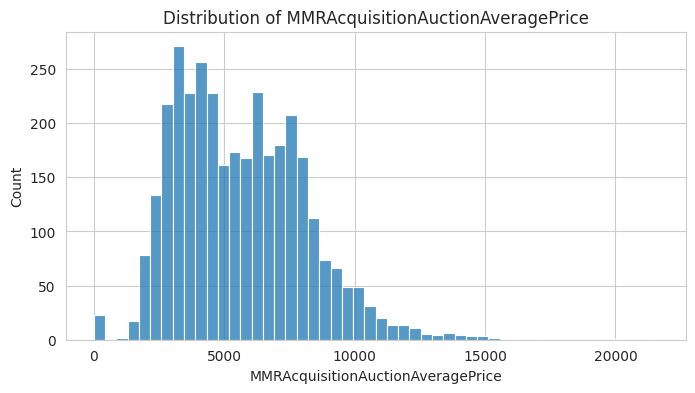

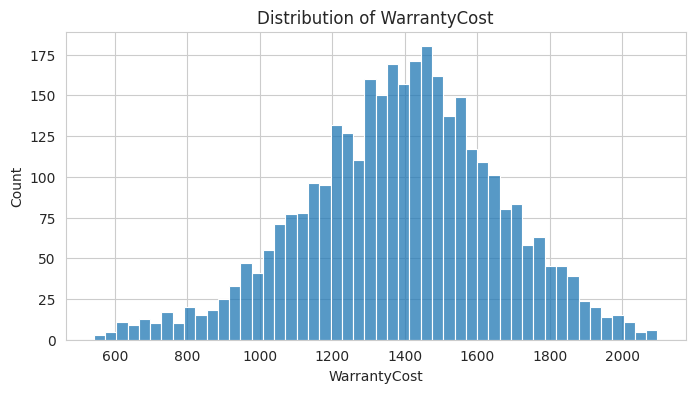

In [65]:
import matplotlib.pyplot as plt


# 

# Convert PurchDate to datetime if not already done
df['PurchDate'] = pd.to_datetime(df['PurchDate'])

# PurchDate visualization: count of purchases by date
df['PurchDate'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Number of Purchases Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Number of Purchases')
plt.show()

# IsBadBuy visualization: count of 0's and 1's
df['IsBadBuy'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.title('Distribution of IsBadBuy')
plt.xlabel('IsBadBuy')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Bad Buy', 'Bad Buy'], rotation=0) # Properly name the ticks
plt.show()

# Now let's visualize some numeric columns
# Select a few columns to visualize, or use df.select_dtypes(include=[np.number]) to select all numeric columns
numeric_cols = ['VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost']

# Plot histograms for each selected numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=50, kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()


In [66]:
# Check for the number of null values in each column
null_counts = df.isnull().sum()

# Display the null counts
print(null_counts)

RefId                                0
IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
PRIMEUNIT                            0
AUCGUART                 

In [67]:
# Total number of null values in the DataFrame
total_nulls = df.isnull().sum().sum()

# Display the total null counts
print(f'Total number of null values in the DataFrame: {total_nulls}')


Total number of null values in the DataFrame: 0
